
---
<big><big><big><big><big><big>Metody uczenia maszynowego</big></big></big></big></big></big>

---



---
<big><big><big><big><big>Metody kernelowe i odległościowe</big></big></big></big></big>

---



---

<id=tocheading><big><big><big><big>Spis treści</big></big></big></big>
<div id="toc"></div>

---

In [3]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
# -*- coding: utf-8 -*-

import numpy as np
np.set_printoptions(precision=3)
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rc('font', family='Arial')
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

plt.style.use("fivethirtyeight")

from bokeh.io import gridplot, output_file, show
from bokeh.plotting import figure, output_notebook
from bkcharts import Scatter

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron, LinearRegression, LogisticRegression
from sklearn.preprocessing import scale
from sklearn.datasets import make_circles, make_classification, make_hastie_10_2, make_moons
from sklearn.datasets import make_multilabel_classification, make_blobs, make_checkerboard
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, SVR

In [5]:
output_notebook()

Loading BokehJS ...

In [ ]:
Image inclusion
<img src="../mum_figures/" width="100%">

# Metody oparte na odległościach 
1. __GLM__ 
  * modelują problem na wektorach przykładów
  * porzucają zbiór uczący 
  * ewaluują __sam__ model
2. __pamięciowe__
  * zapisują biór w pamięci
  * ewaluują na podstawie odległości
    * konieczna definicja odpowiednich miar odległosci
3. __kernelowe__
  * budowa równoważnego modelu __dualnego__
  * predykcje jako kombinacje funkcji _kerneli_ na przykładach uczących
  $$k(x, y)=\phi(x)^T\phi(y),$$
  * kernel liniowy $k(x,y)=x^Ty$
  * kernele liniowe, wielomianowe, radialne, ...
  * __kernel trick__
    * jeśli w rozwiązaniu występuje kernel w postaci liniowej, to __można__ go zastąpić innym kernelem spełniającym pewne warunki
  * kernele nie tylko działające na wektorach liczb

# Metoda najbliższych sąsiadów

1. klasyfikacja $x$ podobnie do najbliższego z przykladów
2. __najbliższego sąsiada__
  * __bezparametryczna__
  * nie zakłada rozkładów gęstości
  * zbiór przykładów $\{(x_n, y_n), n=1,\dots,N\}$
  
3. __k-nearest neighbours k-NN__
    * zwykłe głosowanie 
    * głosowanie z odległością do sąsiadów
      * wagi bliższych sąsiadów są wyższe
    * zwiększanie $k$
      * zmniejsza wariancję błędu
      * ale zwiększa bias
  * $k$ nie powinno być wielokrotnością liczby klas $K$ (dla uniknięcia remisów)
  
3. k-NN __nie buduje__ statystycznego modelu danych 
  * nie aproksymuje rozkładu $P(y_k\mid x)$
  * to metoda __pamięciowa__
    * zyskuje gdy jest dużo przykładów
      * ale czaso- i pamieciochłonna
    * granice decyzyjne nieregularne
    
4. błąd k-NN zbliża się do błędu Bayesowskiego jeśli
  * $N\longrightarrow\infty$
  * $k\longrightarrow\infty$
  * $k\,/\,N\longrightarrow0$ 
  
5. niech $N$ jest wysokie 
  * przestrzeń jest _gęsto_ i _równomiernie_ pokryta danymi, 
  * oraz __zakładając ciągłość__ 
  * __wtedy__ obliczone wartości prawdopodobieństwa klas będą zbliżać się do prawdziwego $P(y_k\mid x)$  

6. zalety k-NN
  * szybkie nauczanie
  
6. wady k-NN 
  * ewaluacja: konieczność obliczenia odległości od wszystkich danych dla $x$
    * istnieją oczywiście usprawnienia wyszukiwania
  * duże wymagania pamięciowe k-NN
    * model pamięta wszystkie przykłady
    * są usprawnienia

In [6]:
def k_NN(n_neighbors = 15, n_samples=100, centers=3, cluster_std=2.0):
    X, y = make_blobs(n_samples=n_samples, centers=centers, cluster_std=cluster_std)
    h = .02  # step size in the mesh
    fig, ax = plt.subplots(2, 1, figsize=(10, 20))
    
    cmap_light = ListedColormap([x for x in sns.color_palette("Paired", 10)])
    cmap_bold = ListedColormap([x for x in sns.color_palette("Set2", 8)])

    for k, weights in enumerate(['uniform', 'distance']):
        # we create an instance of Neighbours Classifier and fit the data.
        clf = KNeighborsClassifier(n_neighbors, weights=weights, n_jobs=-1)
        clf.fit(X, y)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)
        ax[k].pcolormesh(xx, yy, Z, cmap=cmap_light)

        ax[k].scatter(X[:, 0], X[:, 1], c=y.astype(int), cmap=cmap_bold)
        ax[k].set_xlim(xx.min(), xx.max())
        ax[k].set_ylim(yy.min(), yy.max())
        ax[k].set_title("{}-NN, weights = '{}'".format(n_neighbors, weights))
        
        fig.tight_layout()

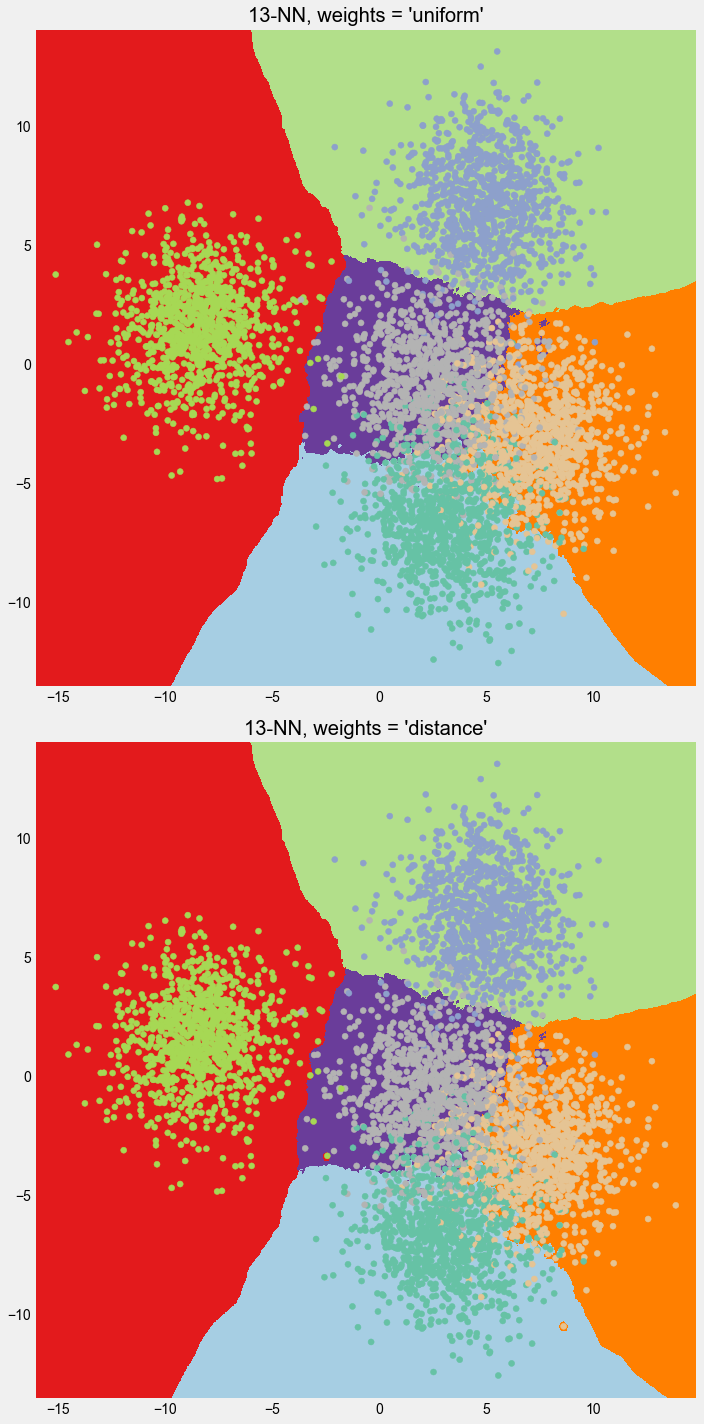

In [7]:
k_NN(n_neighbors=13, n_samples=5000, centers=5)

In [12]:
def k_NN_cv_score(centers=3, n_samples=200, max_neighbours=20):
    X, y = make_blobs(n_samples=200, centers=centers, cluster_std=2.0)
    fig, ax = plt.subplots(figsize=(12, 10))
    cv_no = 10
    
    for k, weights in enumerate(['uniform', 'distance']):
        scores = np.zeros((max_neighbours, 2))
        n_range = range(1, max_neighbours)
        for neigh in n_range:
            clf = KNeighborsClassifier(neigh, weights=weights)
            sc = cross_val_score(clf, X, y, cv=cv_no, n_jobs=-1)
            scores[neigh, :] = [np.mean(sc), np.var(sc)]
        ax.errorbar(n_range, scores[1:, 0], scores[1:, 1], lw=4, label=weights, alpha=0.5)
        best_ind = np.argmax(scores[:, 0])
        print('Najlepsze dla {} k-NN: {} neighbours, {:.5f}+-{:.5f}'.format(weights, best_ind, 
                                                                scores[best_ind, 0], 
                                                               scores[best_ind, 1]))
    ax.set_xlabel('Liczba sąsiadów', fontsize=18)
    ax.set_ylabel("Poprawność klasyfikacji", fontsize=18)
    ax.grid(b=True)
    ax.legend(loc='best')

Najlepsze dla uniform k-NN: 34 neighbours, 0.87000+-0.00860
Najlepsze dla distance k-NN: 25 neighbours, 0.85500+-0.00772


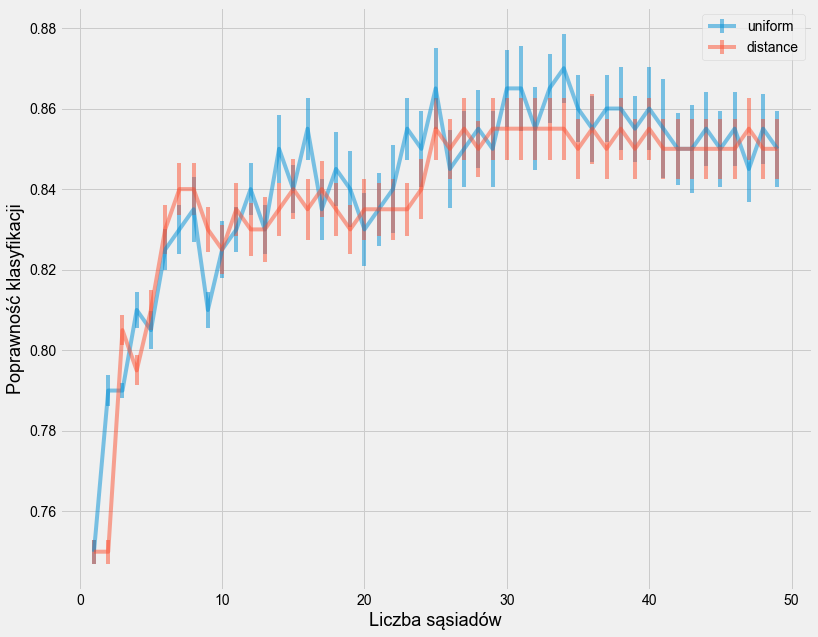

In [13]:
k_NN_cv_score(centers=5, n_samples=100000, max_neighbours=50)

## Wykorzystywane miary odległości
1. najczęściej euklidesowa
  * zależy od konkretnego problemu i typu danych
  * niewygodne gdy atrybuty różnych typów
    * przeskalowanie atrybutu zmienia wynik
  * typowe miary dla przestrzeni w $\mathbb{R}^n$
    * __euklidesowa__ $\sqrt{(\sum_i((x_i-y_i)^2))}$
    * __manhattan__ $\sum_i \mid x_i-y_i\mid$
    * __minkowskiego__ $\sum_i(\mid x_i-y_i\mid^p)^{1/p}$
    * __chebyshewa__ $\sum_i(\max(\mid x_i-y_i\mid))$
    * __Mahalanobis__ $\sqrt{(x-y)^T\Sigma_{-1}(x-y)}$
  * typowe dla boolowskich
    * __Jaccarda__ (__Tanimoto__) $\displaystyle\frac{\mid x\cap y\mid}{\mid x\cup y\mid}$
    * __dice__, __Kulcinski__, etc.
  * dla atrybutów calkowitych
    * __Hamminga__ $\left[(sign(x-y)+1)/2\right]/\left[\sum (sign(x)+1)/2 + \sum(sign(y) + 1)/2\right]$

2. ważne
  * normalizować atrybuty do $[0, 1]$
  * ważyć istotność atrybutów przez walidację krzyżową
  * wykorzystywać __niezmienniczość__ problemu, np. w rozpoznawaniu cyfr
    * niezmienniczość na nieduże rotacje
    * inaczej mierzona odległość _styczna_
    * wyniki klasyfikacji dla problemu rozpoznawania kodów pocztowych na kopertach (za Hastie et al.)
    
|||
|-|-|
|Model|błąd|
|warstwowa sieć neuronowa|$0.049$|
|1-NN, odległość Euklidesowa|$0.055$|
|1-NN, odległość styczna|$0.026$|
||||
3. problemy w __wysokich wymiarach__
  * przykłady są w dużej od siebie odległości
    * dla utrzymania stałej gęstości liczba przykładów powinna być proporcjonalna do $N^D$, gdzie $D$ jest wymiarem
  * najbliższy sąsiad może znajdować się w zupełnie innym miejscu przestrzeni
  * nie ma ciągłosci pokrycia
    * możliwe metody hierarchicznego k-NN

# Uogólnione modele liniowe GLM
---
$$\widehat{y}(x)=\theta_0+\sum_{k=1}^K\theta_k\phi_k(x)$$
1.  __wstępnie zdefiniowane__ nieliniowe funkcje $\phi_k()$
  * wielomiany, sklejane, radialne, furierowskie, etc.
  * funkcje o postaci $$x_1^{p_1}x_2^{p_2}\dots x_l^{p_l}$$ z ograniczeniem $p_1+p_2+\dots+p_m\leq r$
    * razem $$K=\frac{(l+r)!}{r!}$$ czynników
    * $l=10$ i $r=3$ daje $K=286$
      * bardzo dużo parametrów do ustalenia
      * tylko ostra regularyzacja usunie redundantne
  * użycie wielomianów jest uzasadnione tym, że każda ciągła funkcja może być dowolnie dokładnie aproksymowana wielomianami
  
2. $\phi()$ muszą być __wstępnie__ wybrane
  * są __niezależne__ od postaci danych
    * uniemożliwia zminimalizowanie błędu __poniżej__ pewnego progu
  * rozwiązaniem są __funkcje zależne od oryginalnych danych__
    * przykładem rozwiązania są sieci neuronowe
      * modele stają się nieliniowe
      * są jednak trudniejsze w optymalizaji

# Twierdzenie Covera
1. użycie funkcji bazowych
  * lepszy błąd w problemach regresji
  * argumenty aproksymacji nie przenoszą się do klasyfikacji
    * problem binarny $y\in\{-1,+1\}$
    * __nie jest__ istotne by $\widehat{y}$ było (_prawie_) równe $+1$ czy $-1$
      * wystarczy, że jest bliższe poprawnej odpowiedzi, niż niepoprawnej 
    
>$x_1,x_2,\dots,x_N\in\mathbb{N}^p$ są w __uogólnionym położeniu__ (ang. general position), jeśli __nie__ istnieje podzbiór $p+1$ punktów leżących na $(p-1)$-wymiarowej hiperpłaszczyźnie
  * $x\in\mathbb{R}^2$ to __nie__ mogą 3 punkty leżeć na jednej prostej
  * $x\in\mathbb{R}^3$, to 4 punkty __nie__ mogą leżeć na jednej hiperpłaszczyźnie
  * $x\in\mathbb{R}^K$, to $K+1$ punktów __nie__ może leżeć na jednej hiperpłaszczyźnie

---
> Twierdzenie (Covera) Liczba wszystkich możliwych grupowań (__dychotomii__) $O(N, p)$, które mogą być utworzone przez $(p-1)$-wymiarowe hiperpłaszczyzny dla rozdzielenia $N$ punktów na __dwie__ klasy jest dana przez >$$O(N, p)=2\sum_{i=0}^p\binom{N-1}{i}$$ 
  gdzie  
  $$\binom{N-1}{i}=\frac{(N-1)!}{(N-i-1)!i!}$$
  
3. tw. Covera mówi o __pojemności__ modelu klasyfikatora
  * to jest podział __liniowy__
    * stąd mówimy o problemach __liniowo separowalnych__
  * każdy podział jest liczony dwukrotnie: 
    * punkty z jednej klasy mogą należec do klasy $c_1$ lub do $c_2$
  * dla 4 punktów na płaszczyźnie mamy $O(4,2)=14$
  * wszystkich możliwych kombinacji $N$ punktów na 2 grupy jest $2^N=16$
    * a więc niektórych brakuje?
  * dla $N\leq p+1$ zachodzi $O(N,p)=2^N$ (a więc wszystkie)
    
  > Dla $N$ punktów w $p$-wymiarowej przestrzeni, prawdopodobieństwo podzielenia punktów na dwie __liniowo separowalne__ klasy wynosi 
  $$P(N,p)=\frac{O(N,p)}{2^N}=\left\{\array{\frac{1}{2^{N-1}}\sum_{i=0}^p\binom{N-1}{i}&N>p+1\\1&N\leq p+1}\right.$$

  <img src="../mum_figures/cover_theorem.png" width="90%"/> [Za Theodoridis ($l$ na rysunku odpowiada wymiarowości $p$)]
  
  * $r=N/(p+1)$ czyli stosunek liczby punktów do wymiarowości plus jeden
  * dla $r\leq1$ jest zawsze pewność podziału
  * dla $r=2$ czyli $N=2(p+1)$ prawdopodobieństwo jest zawsze $\displaystyle\frac{1}{2}$
    * $O(2(p+1),p)=2^{2p+1}$
  * dla przestrzeni o __wyższym wymiarze__ $p$ ($l$ na rysunku)) krzywa jest bardziej stroma
    * prawdopodobieństwo liniowego podziału dąży równomiernie do jedności wraz ze wzrostem wymiaru przestrzeni!
    
    
  

## Twierdzenie Covera

4. jak wykorzystać tw. Covera?
  * utworzyć mapowanie
  $$\phi:\mathbb{R}^p\longrightarrow\mathbb{R}^K\;\;K\gg p$$
  * im większe $K$, tym większa szansa na rozdzielenie zadanych punktów
  * czy to jednak najlepsze rozwiązanie?
    * przykładowe 
    $$\phi:\mathbb{R}^2\ni[x_1,x_2]\longrightarrow
    [x_1,x_2,4\exp(-(x_1^2+x_2^2)/3)+5]\in\mathbb{R}^3$$
    <img src="../mum_figures/cover_mapping.png" width="100%"/>[Za Theodoridis]
      * punkty wyraźnie separowalne
      * punkty leżą na rozmaitości o __oryginalnym wymiarze__!
        * nie da się oszukać natury __dodając__ informację, której nie ma!
        * możemy __dodając__ cechy __wyekstrahować informację__ normalnie niedostępną dla klasyfikatorów danego typy
        
5. w wysokich wymiarach trzeba dopasować dużą liczbę parametrów
  * uwaga na overfitting i słabą generalizacją
  * potrzebne procedury ostrożnego zwiększania wymiaru
    * nowe wymiary muszą zależeć od danych
    * koniecznie trzeba zastosować silne procedury __regularyzacji__ dla redukcji zbędnych parametrów

In [14]:
def plot_hyperplane(c, color, ax, xmin, xmax, coef, intercept):
    def line(x0):
        return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]

    ax.plot([xmin, xmax], [line(xmin), line(xmax)],
             ls="--", lw=4, color=color)

In [15]:
def simple_separation(alpha=0.005):
    def line(x0):
        return (-(x0 * coef[0, 0]) - intercept) / coef[0, 0]

    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    data = [[.2, .2, -1], [.25, .4, -1], [.3, .65, -1], [.6, .6, -1], [.55, .625, -1],
            [.05, .05, -1], [.07, .1, -1], [.1, .45, -1], [.12, .3, -1], [.12, .1, -1], [.3, .07, -1,],
            [.025, .025, -1], [.1, .05, -1], [.05, .25, -1], [.15, .2, -1],
            [.5, .8, +1], [.7, .9, +1], [.8, .8, +1], [.85, .85, +1], [.9, .75, +1],
            [.2, .85, +1], [.5, .75, +1]]
    data = np.array(data)
    
    # simple linear classifier part
    clf = SGDClassifier(alpha=alpha, max_iter=1000)
    clf.fit(data[:, :-1], data[:, -1])
    coef = clf.coef_
    intercept = clf.intercept_
    
    colors = ['orange', 'navy']
    for i, color in zip(clf.classes_, colors):
        idx = np.where(data[:, -1] == i)
        ax.scatter(data[idx, 0], data[idx, 1], c=color, marker='o', s=64, alpha=0.6,
                   cmap=plt.cm.Paired)
    
    for i, color in zip(clf.classes_[:-1], colors):
        plot_hyperplane(int(i), color, ax, xmin=0.0, xmax=1.0, 
                        coef=clf.coef_, intercept=clf.intercept_)

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    
    print("SGD coefficients:", clf.coef_, clf.intercept_)
    normal_vector = clf.coef_[0] / np.sqrt(np.dot(clf.coef_[0], clf.coef_[0]))
    normal_length = -clf.intercept_[0] / np.sqrt(np.dot(clf.coef_[0], clf.coef_[0]))
    normal_scaled = normal_vector * normal_length
    ax.arrow(0, 0, normal_scaled[0], normal_scaled[1], ls='--', lw=2, 
             color='orange', length_includes_head=True)

    # a simple SVC
    svc = SVC(kernel=str('linear'), C=1000) 
    X = data[:, :-1]
    Y = data[:, -1]
    svc.fit(X, Y)
    print("SVC coefficients:", svc.coef_, svc.intercept_)
    svc_normal = svc.coef_[0] / np.sqrt(np.dot(svc.coef_[0], svc.coef_[0]))
    svc_normal_length = -svc.intercept_[0] / np.sqrt(np.dot(svc.coef_[0], svc.coef_[0]))
    svc_normal_scaled = svc_normal * svc_normal_length
    ax.arrow(0, 0, svc_normal_scaled[0], svc_normal_scaled[1], ls='--', lw=1, 
             color='black', length_includes_head=True)
    w = svc.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0.0, 1.0)
    yy = a * xx - (svc.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = svc.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = svc.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')
    ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1],
            s=196)  #, facecolors='none')
    print("Uwaga: rysunek przeskalowany, stąd nie widać kątów prostych")

SGD coefficients: [[  1.702  11.557]] [-8.935]
SVC coefficients: [[  1.667  16.666]] [-12.333]
Uwaga: rysunek przeskalowany, stąd nie widać kątów prostych


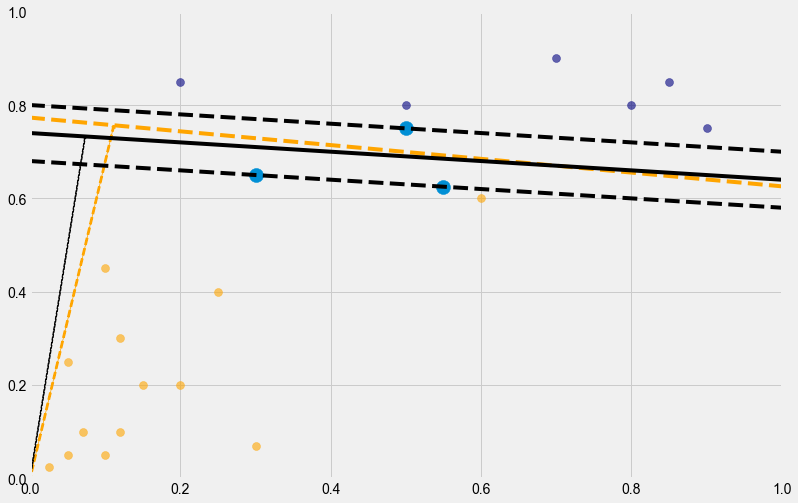

In [16]:
simple_separation(alpha=0.001)

# Postać dualna problemu
1. metody zwykle __parametryczne__: dla modelu wyszukiwany (uczony) jest wektor __parametrów__ $\theta$

$$\widehat{y}=f(x, w)$$
2. można __pamiętać__ przykłady uczące i budować modele oparte na gęstości
  * Parzen window z kombinacją funkcji ___jądra___ wokół przykładów uczących
  * modele k-sąsiadów
    * modele _pamięciowe_ z __ustaloną__ funkcją odległości
    
3. modele mogą być w __równoważnej__ postaci __dualnej__
  * predykcje są liniowymi kombinacjami funkcji __jądra__ obliczanych w punktach danych 

  $$k(x_1, x_2)=\Phi(x_1)^T\Phi(x_2)$$
4. tzw. __kernel trick__ pozwala na budowę nowych funkcji jądra __bez__ konieczności budowy funkcji cech
  * funkcje jądra mogą zapewniać pewne żądane cechy, np. inwariantność na obrót, translację, itp.
  * ułatwienie obliczeń
  
> Skąd nazwa __kernel__? Pochodzi z pierwszego użycia tego typu funkcji przez Hilberta w badaniach nad operatorami całkującymi: _funkcja $k()$ która powoduje powstanie operatora $T_k$ poprzez $$(T_kf)(x)=\int_\mathcal{X}k(x,y)f(y)dy$$ jest nazywana __kernelem__ operatora $T_k$_.

## Algorytm perceptronu
1. pomysł Franka Rosenblatta z 1957 roku
2. perceptron realizuje funkcję 
$$y=\theta_0+\theta^Tx$$
dla $y\in\{-1,1\}$
  * jeśli $x_n$ jest __niepoprawnie__ klasyfikowany, to przykład jest __dodawany__ (__odejmowany__) od wektora parametrów (wag) $\theta$
  
  $$\begin{align}
  [\theta, \theta_0]&=[\theta,\theta_0]+\eta[y_nx_n, y_n]\\
  &=\eta{}y_n[x_n, 1]
  \end{align}$$
  dla $\eta>0$
  * jeśli $\widehat{y}_ny_n<0$, to niepoprawna klasyfikacja 
  * czynnik $\eta y_n<0$ jeśli __niepoprawna__ klasyfikacja
  * to algorytm __stochastycznego spadku gradientu__!
  
  * jeśli problem jest liniowo separowalny, to algorytm znajduje rozwiązanie w __skończonej__ (choć możliwe, że bardzo dużej) liczbie kroków
  * algorytm znajdzie dowolne rozwiązanie, które niekoniecznie będzie optymalne
    * ale co to znaczy, że optymalne?
    
> Frank Rosenblatt (1928-1971) psycholog amerykański, pracował na Cornell jako kognitywista, pracował w dziedzinie sztucznej inteligencji, najlepiej znany za propozycję perceptronu
> <div>
<img src="../mum_figures/rosenblatt.png" width="60%"/>
</div>

## Perceptron: postacie pierwotna i dualna problemu
---

### postać pierwotna algorytmu uczenia perceptronu

1. $y * (\theta^T x + b) >0$ oznacza __prawidłową__ klasyfikację
```python
theta=0, b=0
R=max_i ||x_i||
modified = True
while modified:
    modified = False
    for i in range(N):
        if y_i*(\theta^T x + b) <= 0:
            modified = True
            theta = theta + eta y_i x_i
            theta_0 = theta_0 + eta y_i R^2
```      
2. co robi algorytm?
  * dla __źle__ zaklasyfikowanego przykładu 
    * __dodaje__ $x_i$ ze stałą uczącą, jeśli przykład z klasy $+1$
    * __odejmuje__ $x_i$ ze stałą uczącą, jeśli przykład z klasy $-1$
  * to __obrót__ hiperpłaszczyzny rozdzielającej
  * model ma postać $$\boxed{\theta=\sum_{i=1}^N\alpha_iy_ix_i\;}\tag{*}$$
  * hiperpłaszczyzna $(\theta, theta_0)$ jest płaszczyzną decyzyjną
3. najmniejszą odległość od jednego z przykładów od hiperpłaszczyzny nazywamy __marginesem funkcjonalnym__
  * SVM __maksymalizuje__ margines funkcjonalny
  
---    
### postać dualna algorytmu uczenia perceptronu

```python
alpha=0, b=0
R=max_i ||x_i||
modified = True
while modified:
    modified = False
    for i in range(N):
        if y_i * (sum_k(alpha_i * y_i <x_k, x_i>) + theta_0) <= 0:
            modified = True
            alpha_i = alpha_i + 1
            theta_0 = theta_0 + y_i R^2
```      
1. jeśli przykład $x_i$ jest źle klasyfikowany
  * __częściej źle__ klasyfikowane będą __dodawane częściej__
  * nie sprawiające kłopotów nie będą w ogóle dodawane
    * to zależy od procesu uczenia i kolejności
  * o rozwiązaniu  __decydują przykłady blisko granicy decyzyjnej__
    * $\alpha_i$ może służyć do rangowania przykładów ze względu na ich zawartość informacyjną
  * prawdopodobnie wystarczą przykłady __najbliższe__!
2. model

  $$\boxed{\begin{align}
  \widehat{y}(x)&=sgn(\theta^Tx+b)\\
  &=sgn\left(\left<\sum_{j=1}^N\alpha_jy_jx_j\cdot x\right>+b\right)\\
  &=sgn\left(\sum_{j=1}^N\alpha_jy_j<x_j\cdot x>+b\right)
  \end{align}\;}$$
  
3. dla większości modeli liniowych istnieje postać dualna
4. dane wyłącznie jako elementy __macierzy Grama__

$$K=\Phi\Phi^T\hspace{3ex} K_{ij}(x_i, x_j)=<\phi(x_i),\phi(x_j)>$$
* w modelu dane uczące __jedynie__ przez istotność $\alpha_i$ ich __iloczynu skalarnego z przykładem rozpoznawanym__

5. __mapowanie__ przykładów do __przestrzeni cech__ $\phi(x):X\longrightarrow H$ 
  * przestrzeń cech może być w niektórych wypadkach nieskończenie wymiarowa
  * iloczyn skalarny obrazów w przestrzeni cech zapisany jako
  $$\boxed{<\phi(x_i),\phi(x_j)>=k(x,y)\;}$$
  nazywamy __kernel trick__
    * operacje w przestrzeni cech można wykonać w sposób efektywny przez operacje w przestrzeni o niższym wymiarze

## Postać dualna w problemie regresji
1. kwadratowa funkcja kosztu
$$L(\theta)=\sum_n(\theta^T\phi(x_n)-y_n)^2+\frac{1}{\lambda}\theta^T\theta$$
  * składnik $$\frac{1}{\lambda}\theta^T\theta$$ jest składnikiem __regularyzacji__ __L2__ (albo __ridge regression__)
2. z tego gradient przyrównany do $0$ dla znalezienia $\theta$
$$\begin{align}
\nabla_\theta L(\theta)&=\sum_n(\theta^T\phi(x_n)-y_n)\phi(x_n)+\lambda\theta=0\\
\theta&=-\frac{1}{\lambda}\sum_n(\theta^T\phi(x_n)-y_n)\phi(x_n)\\
&=\sum_n\alpha_n\phi(x_n)=\Phi^T\alpha,\tag{*}\\
\end{align}$$
gdzie
$$\alpha_n=-\frac{1}{\lambda}(\theta^T\phi(x_n)-y_n)\tag{**}$$
3. postać __dualna__ stara się rozwiązać zadanie __ze względu na $\alpha$__
  * funkcja kosztu na teraz postać po podstawieniu rozwiązania na $\theta$
  $$L(\alpha)=\frac{1}{2}\underbrace{\alpha^T\Phi}_{\theta}\,\Phi^T\underbrace{\Phi\Phi^T}_{K}\,\alpha -\alpha\Phi\Phi^TY+\frac{1}{2}Y^TY+\frac{\lambda}{2}\alpha^T\Phi^T\Phi$$
  gdzie $K$ jest symetryczną macierzą taką, że $$K_{ij}=\phi(x_i)\phi(x_j)=k(x_i, x_j)$$
  
  $$L(\alpha)=\frac{1}{2}\alpha^TKK\alpha-\alpha^TKY+\frac{1}{2}Y^TY+\frac{\lambda}{2}\alpha^TK\alpha$$
  
4. jakie jest rozwiązanie dla $\alpha$? z definicji (**)
$$\begin{align}
\alpha&=-\frac{1}{\lambda}(\theta^T\Phi-Y)\\
&=-\frac{1}{\lambda}(\alpha^T\Phi\Phi^T-Y)\tag{z *}\\
&=-\frac{1}{\lambda}\alpha^T\Phi\Phi^T+\frac{1}{\lambda}Y\\
\lambda\alpha+\alpha^T\Phi\Phi^T&=Y\\
\alpha(K+\lambda\mathbb{I})&=Y\\
\alpha&=(K+\lambda\mathbb{I})^{-1}Y
\end{align}$$

5. jaką ma postać predykcja?
$$\begin{align}
y(x)&=\theta^T\phi(x)\\
&=\alpha^T\Phi\phi(x)\tag{z *}\\
&=k^T(x)\,\underbrace{(K+\lambda\mathbb{I})^{-1}Y}_{\alpha},
\end{align}$$
gdzie $k(x)$ jest wektorem funkcji jądra $k(x,\cdot)$ z __wszystkimi__ przykładami uczącymi

6. __postać dualna__ rozwiązanie regresji jest zdefiniowane w kategoriach wartości $k(x, x_n)$
7. w pierwotnej rozwiązanie $$\theta=(X^TX)^{-1}X^TY$$
  * w postaci pierwotnej odwracana macierz $M\times{}M$
  * w dualnej odwarcana macierz $N\times{}N$
  * zwykle $N>M$, a więc co jest grane???
  * możliwe jest zdefiniowanie rozwiązania __wyłącznie__ przez macierz $K$
  * __nie ma__ potrzeby definiowania $\Phi$ ___explicite___

### Funkcja jądra zdefiniowana przez pośrednie mapowanie do przestrzeni cech
---
1. iloczyn skalarny $<x\cdot y>$ jest przykładem jądra
2. zwykle potrzebna __nieliniowość__ 
  * możliwe jądro $<x\cdot y>^2$
$$\begin{align}
<x\cdot y>^2&=(x_1y_1+x_2y_2)^2\\
&=x_1^2y_1^2+2x_1y_1x_2y_2+x_2^2y_2^2\\
&=(x_1^2,\sqrt{2}\,x_1x_2,x_2^2)^T(y_1^2,\sqrt{2}\,y_1y_2,y_2^2)
\end{align}$$
  * zawiera wszystkie $\displaystyle \binom{M+p-1}{p}$ jednomianów stopnia $p$ dla $k(x,y)=<x\cdot y>^p$
3. zmodyfikowane jądro
$$\begin{align}
<x\cdot y+c>^2&=(x_1y_1+x_2y_2+c)^2\\
&=x_1^2y_1^2+2x_1y_1x_2y_2+2cx_1y_1+x_2^2y_2^2+2cx_2y_2+c^2\\
&=(x_1^2,\sqrt{2}\,x_1x_2,\sqrt{2c}\,x_1,x_2^2,\sqrt{2c}\,x_2,c)^T(y_1^2,\sqrt{2}\,y_1y_2,\sqrt{2c}\,y_1,y_2^2,\sqrt{2c}\,y_2,c)
\end{align}$$
  * podobnie dla wykładnika $p>2$
    * każdy składa się z $\displaystyle \binom{M+p}{p}$ składników: jednomian rzędu do $p$ włącznie

('SGD coefficients:', array([[ 0.724,  4.881]]), array([-3.266]))
('SVC coefficients:', array([[  1.667,  16.666]]), array([-12.333]))
Uwaga: rysunek przeskalowany, stąd nie widać kątów prostych


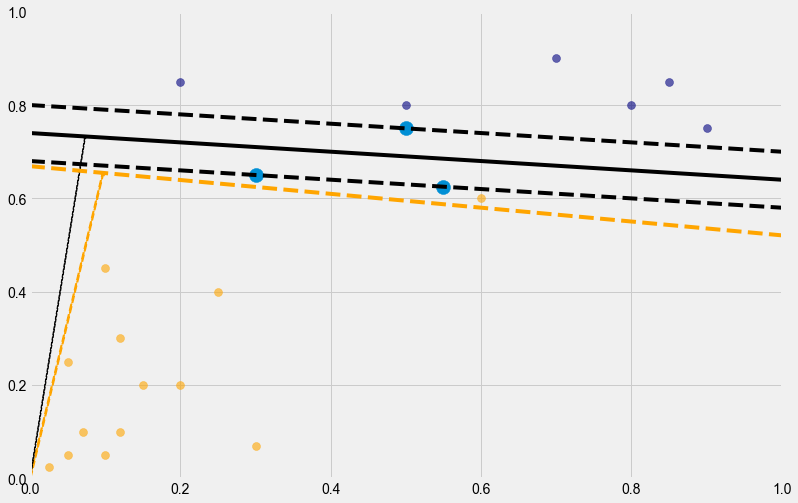

In [45]:
simple_separation()

## Hiperpłaszczyzny rozdzielające

1. problemy liniowo separowalne mogą mieć __nieskończenie wiele__ hiperpłaszczyzn rozdzielających 
  * rozwiązanie na rysunku ma postać
  $$\{x: \theta_0+\theta^Tx=0\}$$
  * kilka przykładów jest zwykle klasyfikowanych błędnie
2. $\theta^\ast=\theta\,/\,\|\theta\|$ jest normalny do hiperpłaszczyzny, 
  * stąd
  $$\theta^Tx_0+\theta_0=0\;\longrightarrow\;\theta^Tx_0=-\theta_0$$
  dla $x_0$ leżących na hiperpłaszczyźnie rozdzielającej
* __odległość__ punktu od hiperpłaszczyzny to
$$\begin{align}
\theta^{\ast^T}(x-x_0)&=\frac{1}{\|\theta\|}(\theta^Tx-\theta^Tx_0)\\
&=\frac{1}{\|\theta\|}(\theta^Tx+\theta_0)=\frac{1}{\|g'(x)\|}g(x)
\end{align}$$
gdzie $g(x)=\theta_0+\theta^Tx=0$ jest hiperpłaszczyzną rozdzielającą
  * $g(x)$ jest __proporcjonalne__ do odległości $x$ od hiperpłaszczyzny rozdzielającej

# Klasyfikator o maksymalnym marginesie funkcjonalnym
---
> __Optymalna__ hiperpłaszczyzna rozdzielająca prawidłowo rozdziela klasy oraz __maksymalizuje__ odległość między najbliższymi przykładami z dwóch klas

---


1. problem klasyfikacji __binarnej__
$$\begin{align}
\underset{\theta,\theta_0,\|\theta\|=1}{\max}&M\\
\text{pod warunkiem}\;y_n(\theta^Tx_n+\theta_0)&\geq{}M\;\;n=1,\dots,N 
\end{align}$$
  * warunek __żąda by $y_n$ i $(\theta^Tx_n+\theta_0)$ miały ten sam znak__
  * $M$ to odległość __najbliższych__ punktów od hiperpłaszczyzny
2. mnożąc __lewą__ stronę przez $\displaystyle \frac{1}{\|\theta\|}$ 
  * $y_n(\theta^Tx_n+\theta_0)$: odległość $x$ od hiperpłaszczyzny ze znakiem $y\in\{-1,+1\}$
  * to pozwala usunąć warunek $\|\theta\|=1$
  
  $$\frac{1}{\|\theta\|}y_n(\theta^Tx_n+\theta_0)\geq{}M$$
  
3. dowolne skalowanie $\theta$ (bez zmiany kierunku) też będzie spełniać warunek
  * niech $g(x;\theta,\theta_0)=\theta^Tx+\theta_0$ będzie hiperpłaszczyzną rozdzielającą 
    * $[\lambda\theta,\lambda\theta_0]$ dla $\lambda\in\mathbb{R}^+$ też wyznacza hiperpłaszczyznę rozdzialającą
  * niech więc $\displaystyle\|\theta\|=1\,/\,M$
  * zamieniamy maksymalizację na minimalizację otrzymując warunek na __klasyfikator maksymalizującym margines funkcjonalny__
  $$\boxed{\begin{align}
    \underset{\theta,\theta_0}{\min}&\frac{1}{2}\|\theta\|\\
    \text{pod warunkiem}\;y_n(\theta^Tx_n+\theta_0)&\geq{}1\;\;n=1,\dots,N 
  \end{align}\;}$$

4. problem optymalizacyjny
  * kwadratowe kryterium optymalizacyjne
  * liniowe ograniczenia
  * można więc zapisać jako funkcję Langrange'a $L_P$ (P jak __primary__)
  
  $$L_P=\frac{1}{2}\|\theta\|-\sum_{n=1}^N\alpha_n[y_n(\theta^Tx_n+\theta_0)-1]$$
  * minimalizując ze względu na $\theta$ i $\theta_0$
  
  $$\begin{align}
  \frac{\partial L_P}{\partial\theta}=&\;\theta-\sum_n\alpha_ny_nx_n=0\\
  &\theta=\sum_n\alpha_ny_nx_n\\
  \frac{\partial L_P}{\partial\theta_0}=&\sum_n\alpha_ny_n=0
  \end{align}$$
  
5. podstawiając do $L_P$
  $$\boxed{\begin{align}
  L_D&=\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m-\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m+\sum_n\alpha_n\\
  &=\sum_n\alpha_n-\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m\\
  \text{pod warunkiem}\;\;&\sum_n\alpha_ny_n=0\;\text{oraz}\;\alpha_n\geq0\\
  \text{a także}\;\;&\alpha_n[y_n(\theta^Tx_n+\theta_0)-1]=0\;\forall{}n
  \end{align}\;}$$
  * $L_D$ jest postacią __dualną__ do $L_P$
  * t0 __warunkami Karusha-Kuhna-Tuckera__:
    $$\begin{align}
    \left.\frac{\partial}{\partial\theta}L(\theta,\alpha)\right|_{\theta=\theta^{\ast}}&=0\\
    \alpha_n&\geq0\hspace{2ex}\forall\;n\\
    \alpha_n f(\theta^{\ast})&=0\hspace{2ex}\forall\;n
    \end{align}$$
    * warunki KKT zapewniają równoważność problemów pierwotnego i dualnego
5. własności
  * jeśli $\alpha_n>0$, to $y_n(\theta^Tx_n+\theta_0)=1$
    * wtedy $x_n$ leżą dokładnie w odległości $1$ od granicy decyzyjnej
  * jeśli $y_n(\theta^Tx_n+\theta_0)>1$, to $\alpha_n=0$
  * rozwiązanie __liniową kombinacją__ przykładów __dokładnie__ na brzegu marginesu funkcjonalnego
      * to __wektory podtrzymującyce__ (ang. __support vectors__)
    * przykłady "_lepiej niż poprawnie_" klasyfikowane __nie mają bezpośredniego__ wpływu na rozwiązanie
    * szerokość marginesu funkcjonalnego $$\displaystyle \frac{1}{\|\theta\|}+\frac{1}{\|\theta\|}$$
      * $\frac{1}{\|\theta\|}$ to odległość najbliższych od granicy decyzyjnej (z definicji równa $1$)
  * w rozwiązaniu jedynie iloczyny skalarne $x_n^Tx_m$ __wszystkich par__ wektorów
  * bias $\theta_0$ nie pojawia się w rozwiązaniu
    * stąd trzeba je znaleźć z postaci pierwotnej problemu
    $$\boxed{\theta_0=-\frac{1}{2}\left[\underset{y_n=+1}{\max}\theta^Tx_n+\underset{y_n=-1}{\max}\theta^Tx_n\right]\;}$$
  * taka postać rozwiązania pozwala na przedstawienie go z użyciem kerneli
  * maksymalizowana funkcja kosztu jest wypukła
    * rozwiązanie jest __jednoznaczne__
    * nie ma minimów lokalnych
    
6. rozwiązanie __klasyfikatora o maksymalnym marginesie__ ma postać
  $$\boxed{h(x;\theta,\theta_0)=\sum_{n\in{}SV}\alpha_ny_n<x,x_n>+\theta_0\;}$$
  gdzie $SV$ oznacza zbiór wektorów podtrzymujących
  * to rozwiązanie jest możliwe tylko dla problemów liniowo separowalnych


In [40]:
def simple_linear_svc():
    fig, ax = plt.subplots(1, 1, figsize=(12, 10))
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.0])
    
    data = [[.2, .2, -1], [.25, .4, -1], [.3, .65, -1], [.55, .45, -1], [.5, .5, -1],
            [.05, .05, -1], [.07, .1, -1], [.1, .45, -1], [.12, .3, -1], [.12, .1, -1], [.3, .07, -1,],
            [.025, .025, -1], [.1, .05, -1], [.05, .25, -1], [.15, .2, -1],
            [.5, .8, +1], [.7, .9, +1], [.8, .8, +1], [.85, .85, +1], [.9, .75, +1],
            [.2, .85, +1], [.5, .75, +1]]
    data = np.array(data)
    X = data[:, :-1]
    Y = data[:, -1]
    clf = SVC(kernel=str('linear'), C=10000, gamma=0.1)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(0, 1)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors
    b = clf.support_vectors_[0]
    yy_down = a * xx + (b[1] - a * b[0])
    b = clf.support_vectors_[-1]
    yy_up = a * xx + (b[1] - a * b[0])

    # plot the line, the points, and the nearest vectors to the plane
    ax.plot(xx, yy, 'k-')
    ax.plot(xx, yy_down, 'k--')
    ax.plot(xx, yy_up, 'k--')
    clf_norm = np.sqrt(np.dot(clf.coef_[0], clf.coef_[0]))
    svc_normal = clf.coef_[0] / clf_norm
    svc_normal_length = -clf.intercept_[0] / clf_norm
    svc_normal_scaled = svc_normal * svc_normal_length
    #ax.arrow(0, 0, svc_normal_scaled[0], svc_normal_scaled[1], ls='--', lw=1, 
    #         color='black', length_includes_head=True)

    ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
              s=296)
    ax.scatter(X[:, 0], X[:, 1], c=Y, s=64, cmap=plt.cm.Paired)
    #ax.set_xlim([0.0, 1.0])
    #ax.set_ylim([0.0, 1.0])

    ax.axis('tight')

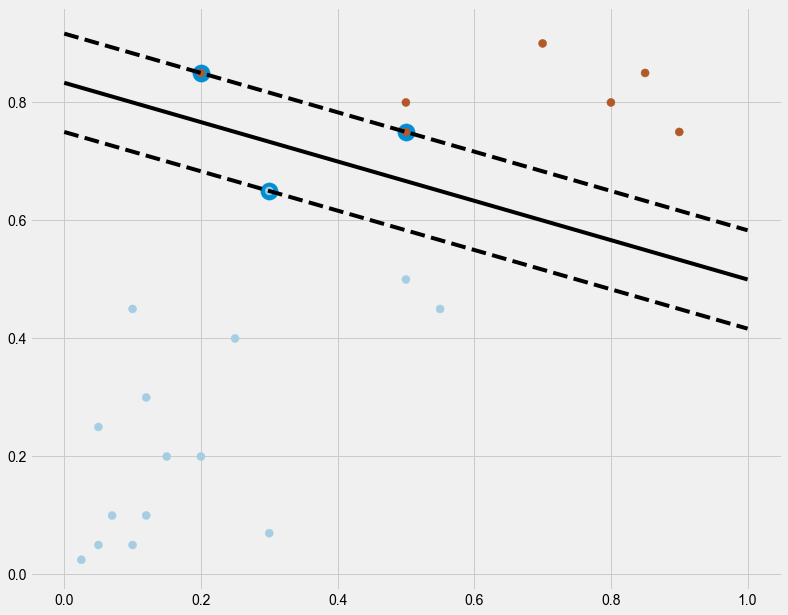

In [41]:
simple_linear_svc()

## Problem separowalny w przestrzeni cech
1. jeśli problem jest separowalny: możliwe rozwiązanie z maksymalizacją marginesu
  $$\boxed{\begin{align}
  L_D&=\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m-\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m+\sum_n\alpha_n\\
  &=\sum_n\alpha_n-\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_mx_n^Tx_m\\
  \text{pod warunkiem}\;\;&\sum_n\alpha_ny_n=0\;\text{oraz}\;\alpha_n\geq0\\
  \text{a także}\;\;&\alpha_n[y_n(\theta^Tx_n+\theta_0)-1]=0\;\forall{}n
  \end{align}\;}$$
  i model ma postać
  $$\boxed{h(x;\theta,\theta_0)=\sum_{n\in{}SV}\alpha_ny_n<x,x_n>+\theta_0\;}$$
2. rozwiązanie dane przez iloczyn skalarny
  > Jeśli problem jest liniowo separowalny w przestrzeni indukowanej przez iloczyn skalarny $k(x,y)$, to problem jest rozwiązywany przez maksymalizację $$\boxed{\begin{align}
  L_D&=\sum_n\alpha_n-\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_mk(x_n,x_m)\\
  \text{pod warunkiem}\;\;&\sum_n\alpha_ny_n=0\;\text{oraz}\;\alpha_n\geq0\;\forall{}n
  \end{align}\;}$$ i model ma postać $$\boxed{h(x;\theta,\theta_0)=\sum_{n\in{}SV}\alpha_ny_nk(x,x_n)+\theta_0\;}$$
   
  ----
3. leave-one-out sugeruje ograniczenie na __oczekiwaną generalizację__
  * jeśli przykład, który __nie jest__ wektorem podtrzymującym zostanie usunięty ze zbioru przykładów, to i tak zostanie prawidłowo zaklasyfikowany
  * oczekiwany poziom generalizacji rzędu $\displaystyle\frac{\mid SV\mid}{N}$
    * im mniej wektorów podtrzymujących, tym lepszy poziom generalizacji
    
4. klasyfikator __nie stara__ się minimalizować liczby wektorów podtrzymujących
  * jest ich zwykle niewiele

## Problemy nieseparowalne
1. klasyfikator maksymalizujący margines funkcjonalny nie dla problemów __nie separowalnych liniowo__
  * jego błąd uczący jest __zawsze__ zerowy!
  * nawet nieduży szum danych uniemożliwi rozwiązanie
  * można pozwolić na rozwiązanie przez wprowadzenie __zmiennych rozluźniających__ $\xi_n$ (ang. slack variables)
  $$\boxed{\begin{align}
    \underset{\theta,\theta_0}{\arg\min}&\frac{1}{2}\|\theta\|\\
    \text{pod warunkiem}\;y_n(\theta^Tx_n+\theta_0)&\geq{}1-\xi_n\;\;n=1,\dots,N\\
    &\xi_n\geq0,\;\forall n
  \end{align}\;}$$
  co można przeformułować
  $$\boxed{\begin{align}
    \underset{\theta,\theta_0}{\arg\min}&\frac{1}{2}\|\theta\|+C\sum_{n=1}^N\xi_n^2\\
    \text{pod warunkiem}\;y_n(\theta^Tx_n+\theta_0)&\geq{}1-\xi_n\;\;n=1,\dots,N
  \end{align}\;}$$
  gdzie $C$ jest czynnikiem kosztu
    * to wymaga znalezienia $C$ zwykle poprzez szereg wartości i walidację krzyżową
      * wybór $C$ daje w efekcie optmalizację $\theta$
      * dla tej wartości $\|\theta\|$ optymalizaowana jest suma $\sum_n\xi_n$
      
2. Lagrangian ma postać
$$L_D=\frac{1}{2}\|\theta\|+\frac{C}{2}\sum_n\xi_n^2-\sum_n\alpha_n[y_n(\theta^Tx_n+\theta_0)-1+\xi_n]$$
  * optymalizacja
  $$\begin{align}
  \frac{\partial L_P}{\partial \theta}&=\theta-\sum_n\alpha_ny_nx_n=0\\
  \frac{\partial L_P}{\partial \theta_0}&=\sum_n\alpha_ny_n=0\\
  \frac{\partial L_P}{\partial \xi}&=C\xi-\alpha=0
  \end{align}$$
  * podstawiając dostajemy postać dualną
  $$\boxed{\begin{align}
  L_D=&\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_m<x_n,x_m>+\frac{1}{2C}<\alpha,\alpha>-\sum_n\sum_m\alpha_n\alpha_my_ny_m<x_n,x_m>\\
  &+\sum_n\alpha_n-\frac{1}{C}<\alpha,\alpha>\\
  =&\sum_n\alpha_n-\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_m<x_n,x_m>+\frac{1}{2C}<\alpha,\alpha>-\frac{1}{C}<\alpha,\alpha>
  \end{align}\;}$$
  * z warunkami KKT
  $$\boxed{\alpha_n[y_n(<x_n,\theta>+\theta_0)-1+\xi]=0, \;\forall\;n\;}$$

3. dla wersji z jądrem
> Niech dany będzie problem, jądro $k(x,y)$ indukujące przestrzeń cech i rozwiązanie problemu przez maksymalizację $$\begin{align}\text{maksymalizuj}\;&L(\alpha)=\sum_n\alpha_n-\frac{1}{2}\sum_n\sum_m\alpha_n\alpha_my_ny_m(k(x_n,x_m)+\frac{1}{C}\delta_{mn})\\\text{pod warunkiem}\;&\sum_n\alpha_ny_n=0\\&\alpha_n\geq0\;\forall\;n
\end{align}$$

## Jak zdefiniować funkcję jądra
1. poprzez $\phi()$ 
$$k(x,y)=<\phi(x),\phi(y)>=\phi(x)^T\phi(y)=\sum\phi_i(x)\phi_j(y)$$
  * wymaga __zdefiniowania i obliczania__ $\phi$
2. __wprost__ $$k(x,y)=(x^Ty)^2$$
  * to wymaga pewności, że tak zdefiniowana funkcja jest poprawna
    * konieczna jest pewność, że dla tak zdefiniowanej funkcji __istnieje__ jakaś $\phi()$, którą można pokazać w postaci 1.
    * taka macierz musi być dodatnio półokreślona

### Pośrednie mapowanie do przestrzeni cech
1. budując model liniowy w przestrzeni $M$-wymiarowej cech szukamy __hipotezy__
$$\boxed{h(x)=\sum_{k=1}^M\theta_k\phi(x_k)+b\;}$$
  * $\phi()$ odwzorowaniem z przestrzeni wejściowej do __przestrzeni cech__
2. w postaci __dualnej__ hipoteza w postaci __relacji między przykładami uczącymi__ a wektorem $x$ dla którego obliczamy wartość
$$\boxed{h(x)=\sum_{n=1}^N\alpha_ny_n<\phi(x_n)\cdot\phi(x)>+b\;}$$
3. jak __bezpośrednio__ obliczać $<\phi(x_n)\cdot\phi(x)>$ __bez__ potrzeby wyliczania przestrzeni cech?
  > Funkcja __jądra__ $k$ jest funkcją dla $x, y\in X$ $$k(x,y)=<\phi(x)\cdot\phi(y)>,$$ gdzie $\phi$ jest odwzorowaniem z $X$ do przestrzeni cech $F$
4. dzięki funkcji jądra wymiar przestrzeni cech __nie będzie__  wpływał na złożoność obliczeniową
  * wymiar przestrzeni cech może być  nieskończony
  * nie ma potrzeby znajomości przestrzeni cech; wystarczy by istniała
  * złożoność nie musi być zależna od wymiarowości przestrzeni cech
  * dane są mapowane __nie wprost__ do przestrzeni cech
  * wszystkie informacje o przykładach są przechowywane w macierzy Grama $K$
  * hipoteza ma teraz postać
  $$\boxed{h(x)=\sum_{n=1}^N\alpha_ny_nk(x_n,x)+b\;}$$

### Różne znane kernele
1. __liniowe__
$$k(x, y)=<x, y>$$
2. __wielomianowe__
$$k(x, y) = (<x, y> + 1)^d$$
3. __gausowskie__
$$k(x,y)=\exp\left(-\frac{\|x-y\|}{2\sigma^2}\right)$$
dla $\sigma>0$
  * nieskończony wymiar generowanej przestrzeni cech

In [19]:
def plot_gaussian_kernel():
    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection='3d')
    X = np.arange(-1, 1, 0.01)
    Y = np.arange(-1, 1, 0.01)
    X, Y = np.meshgrid(X, Y)

    sigma1 = 0.25
    Z1 = np.exp(-((X-Y) ** 2)/(2 * sigma1 ** 2))
    surf = ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=0.5)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    
    ax.view_init(45, 35)

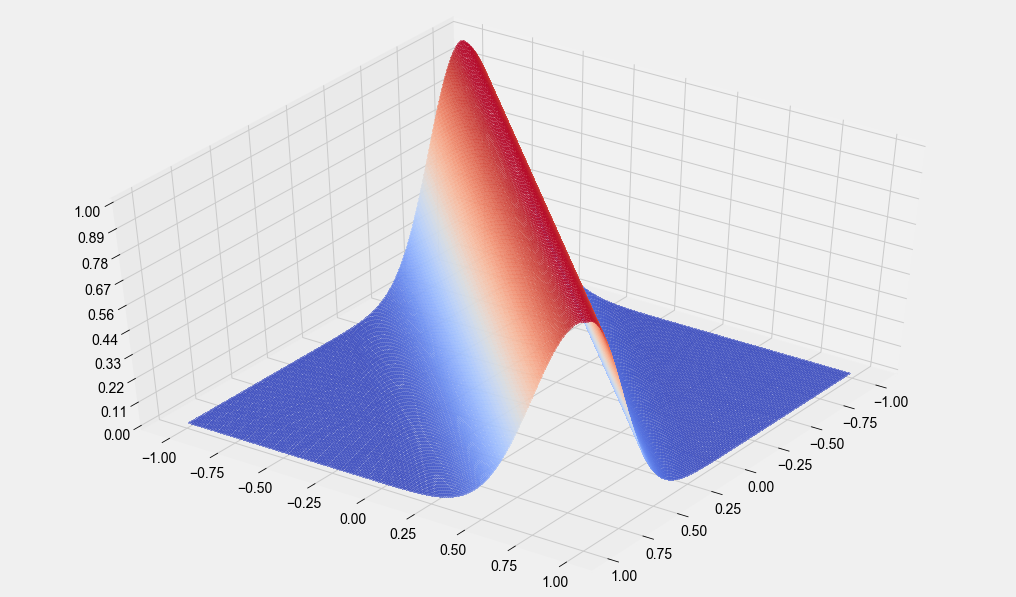

In [20]:
plot_gaussian_kernel()

1. wielomianowe jednorodne
$$k(x,y)=<x\cdot y>^d$$
  * składa się z jednomianów rzędu $d$

In [23]:
def plot_homogenous_kernel():
    figwidth = 230
    figheight = 230
    x = np.linspace(0, 1, 100)
    aa1 = figure(width=figwidth, height=figheight, title=None)
    y = x**2
    aa1.line(x, y, line_width=2)

    aa2 = figure(width=figwidth, height=figheight, title=None)
    x = np.linspace(0, 1, 100)
    colors = ['blue', 'red', 'orange', 'navy', 'green']
    for k, x2 in enumerate([0.1, 0.3, 0.5, 0.7, 0.9]):
        y = np.sqrt(2) * x * x2
        aa2.line(x, y, line_width=2, color=colors[k])
        aa2.x(x2, 0, color=colors[k])

    aa3 = figure(width=figwidth, height=figheight, title=None)
    x = np.linspace(0, 1, 100)
    y = x ** 2
    aa3.line(x, y, line_width=2)

    fig = gridplot([[aa1, aa2, aa3]])

In [24]:
plot_homogenous_kernel()

In [27]:
# a simple plot of a homogenous kernel <x, y>^2
def plot_homogenous_kernel_3d():
    fig = plt.figure(figsize=(16, 10))
    ax = fig.gca(projection='3d')
    X = np.arange(0, 1, 0.01)
    Y = np.arange(0, 1, 0.01)
    X, Y = np.meshgrid(X, Y)
    Z1 = X ** 2
    Z2 = np.sqrt(2) * X * Y
    Z3 = Y ** 2
    surf = ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=0.2)
    surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False)
    surf = ax.plot_surface(X, Y, Z3, rstride=1, cstride=1, cmap=cm.coolwarm,
                           linewidth=0, antialiased=False, alpha=0.2)

    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

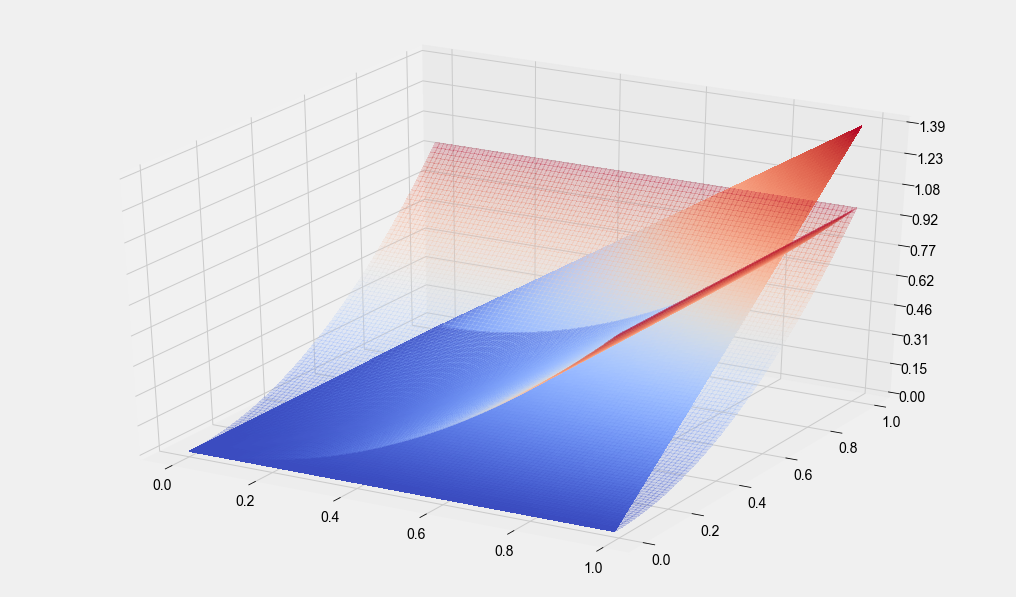

In [28]:
plot_homogenous_kernel_3d()

1. wielomianowe niejednorodne
$$k(x,y)=<x\cdot y + c>^d$$
  * składa się z jednomianów __do__ rzędu $d$
  * wymiar przestrzeni cech dla jąder wielomianowych jest skończony

1. Laplace'a
$$k(x,y)=\exp(t\|x-y\|)$$
dla $t>0$
  * wymiar przestrzeni cech nieskończony

1. spline-wskie
$$k(x,y)=M_{2p+1}(\|x-y\|^2)$$
gdzie $B$ jest funkcją spline-owską zdefiniowaną przez konwolucje

1. samplujące
$$sinc(x)=\frac{\sin \pi x}{\pi x}$$
szczególnie przydatne dla przetwarzania sygnałów

## Konieczne warunki na funkcję jądra
1. __symetryczność__
$$k(x,y)=<\phi(x)\cdot\phi(y)>=<\phi(y)\cdot\phi(x)>=k(y,x)$$
2. __nierówność Cauchego-Schwarza__
$$\begin{align}
k(x,y)^2&=<\phi(x)\cdot\phi(y)>^2\leq\|\phi(x)\|^2\|\phi(y)\|^2\\
&=<\phi(x)\cdot\phi(x)><\phi(y)\cdot\phi(y)\leq k(x,x)k(y,y)
\end{align}$$
---
1. te warunki __nie są wystarczające__ dla istnienia przestrzeni cech indukowanej przez kernel $k()$
  * niech $K=(k(x_i,x_j))_{i,j=1}^N$
  * macierz $K$ jest symetryczna, ponieważ funkcja $k()$ jest symetryczna
  * jeśli K jest symetryczna, to istnieje 
  $$K=V\Lambda V^T$$
  gdzie 
    * $V$ jest ortogonalną macierzą wektorów własnych
    * $\Lambda$ jest diagonalną macierzą wartości własnych
  * zdefiniujmy $\phi$
  $$\phi(x_k)=\left[\sqrt{\lambda_1}v_{1k},\dots,\sqrt{\lambda_i}v_{ik},\dots,\sqrt{\lambda_M}v_{Mk}\right]$$
  * wtedy
  $$\begin{align}<\phi(x_i)\cdot\phi(x_j)>&=\sum_k\sqrt{\lambda_k}v_{ki}\sqrt{\lambda_k}v_{kj}\\
  &=\left(V\Lambda V^T\right)_{ij}=k(x_i,x_j)
  \end{align}$$
  * tak więc macierz Grama $K$ musi mieć __nieujemne__ wartości własne, bo w przeciwnym wypadku dla 
  $$x=\sum_iv_{ki}\phi{x_i}=\sqrt{\Lambda}V^Tv_k$$ 
  dla $\lambda_k<0$ zachodzi
  $$\begin{align}
  \|x\|^2=<x\cdot x>&=v_k^TV\sqrt{\Lambda}\sqrt{\Lambda}V^Tv_k\\
  &=v^T_kKv_k=\lambda_k<0
  \end{align}$$
  co byłoby sprzecznością
 

### Jak tworzyć kernele z innych kerneli?
Jeśli $k_1()$ i $k_2()$ są poprawnymi kernelami nad $X$, a $k_3()$ jest poprawnym kernelem nad $\mathbb{R}\times\mathbb{R}$, to następujące funkcje też są poprawnymi kernelami
$$\begin{align}
1.&\hspace{2ex}k(x,y)=k_1(x_1, y_1)+k_2(x_2, y_2)\\
&\hskip{11em}\text{dla $x=(x_1,x_2)$ i $y=(y_1,y_2)$ i odpowiednich $k_i()$}\\
2.&\hspace{2ex}k(x,y)=c k_1(x,y), \hskip{3.5em}c>0\\
3.&\hspace{2ex}k(x,y)=k_1(x,y)k_2(x,y)\\
4.&\hspace{2ex}k(x,y)=q(k_1(x,y))\\
&\hskip{11em}\text{gdzie $q$ wielomianem o dodatnich współczynnikach}\\
5.&\hspace{2ex}k(x,y)=\exp(k_1(x, y))\\
6.&\hspace{2ex}k(x,y)=f(x)k_1(x,y)f(y), \hskip{3ex}f:X\rightarrow\mathbb{R}\\
7.&\hspace{2ex}k(x,y)=k_3(\phi(x),\phi(y))\\
8.&\hspace{2ex}k(x,y)=x^TAy\\
9.&\hspace{2ex}k(x,y)=k_1(x, y)+k_2(x, y)\\
10.&\hspace{2ex}k(x,y)=k_1(x_1, y_1)k_2(x_2, y_2)\\
&\hskip{11em}\text{dla $x=(x_1,x_2)$ i $y=(y_1,y_2)$ i odpowiednich $k_i()$}\\
\end{align}$$
gdzie 
  1. $p()$ jest wielomianem z dodatnimi współczynnikami
    * w szczególności $\exp(k(x,y))$ jest kernelem, bo $\exp()$ można aproksymować dowolnie dokładnie wielomianami z dodatnimi współczynnikami
  2. $A$ jest dodatnio półokreśloną macierzą
  3. $k_3():\mathbb{R}^l\times\mathbb{R}^l\longrightarrow\mathbb{R}$

  4. $k(x,y)=\exp(k_1(x,y))$ jest kernelem
    * funkcja wykładnicza może być dowolnie dokładnie przybliżona wielomianami o dodatnich wykładnikach
  5. $q()$ wielomianem z nieujemnymi współczynnikam

### Kernele z cech
1. także kernele __z cech__
  * najpierw wyliczyć cechy, 
  * utworzyć iloczyn skalarny
  * __nie ma__ konieczności kontroli półokreśloności macierzy, 
    * przestrzeń $\Phi$ na pewno istnieje
    * wynika bezpośrednio z definicji iloczynu 
  
#### Kernel dla łańcuchów
1. idea: _dwie sekwencje są do siebie podobne jeśli zawierają wiele takich samych podsekwencji_
* dany alfabet $\Sigma$
  * $s$ i $t$ są łańcuchami w $\Sigma^n$
  * podsekwencja $u$ łańcucha $s$ jest określona przez __multi-indeks__ $i=(i_1,i_2,\dots,i_{|u|})$ 
    * litery w $u$ występują w kolejności rosnącej w $s$, ale mogą wystąpić pomiędzy nimi przerwy
2. określamy cechę $\phi_u(s)$ jako
  $$\phi_u(s)=\sum_{i:u=s[i]}\lambda^{l(i)}$$
  gdzie $0\leq\lambda\leq1$, $l(i)$ jest długością podsekwencji $u$ i jest sumą po wszystkich multi-indeksach odpowiadających $u$ w łańcuchu $s$
  * $l(i)$ jest liczbą znaków łańcucha $s$ na których jest rozłożona podsekwencja
    * $l(i)$ __nie jest__ równoważne $|u|$ (to jest liczba znaków w podsekwencji)
  * cechy mierzą liczbę podsekwencji w łańcuchu uwzględniając rozproszenie (przerwy)
3. funkcja jądra
$$\begin{align}
k_n(s,t)&=\sum_{u\in\Sigma^n}<\phi_u(s)\cdot \phi_u(t)>\\
&=\sum_{u\in\Sigma^n}\sum_{i:u=s[i]}\lambda^{l(i)}\sum_{j:u=t[j]}\lambda^{l(j)}\\
&=\sum_{u\in\Sigma^n}\sum_{i:u=s[i]}\sum_{j:u=t[j]}\lambda^{l(i)+\lambda(j)}
\end{align}$$
sumuje się po wszystkich wspólnych podsekwencjach 
  * brana jest pod uwagę ich częstotliwość i rozproszenie
  
4. definicja niestety złożona obliczeniowo
  * możliwa jest jednak definicja rekurencyjna ze względu na indeks $n$ kernela
    * jej złożoność jest proporcjonalna do $n*|s|*|t|$

In [29]:
sns.set(font_scale=2.5)

In [36]:
def try_svc(CC=100):
    # Our dataset and targets

    data = [[.2, .2, -1], [.25, .4, -1], [.3, .65, -1], [.6, .6, -1], [.55, .625, -1],
            [.05, .05, -1], [.07, .1, -1], [.1, .45, -1], [.12, .3, -1], [.12, .1, -1], [.3, .07, -1,],
            [.025, .025, -1], [.1, .05, -1], [.05, .25, -1], [.15, .2, -1],
            [.5, .8, +1], [.7, .9, +1], [.8, .8, +1], [.85, .85, +1], [.9, .75, +1],
            [.2, .85, +1], [.5, .75, +1]]
    data = np.array(data)
    X = data[:, :-1]
    Y = data[:, -1]
    # figure number
    fignum = 1
    
    # fit the model
    for kernel, c in zip((str('linear'), str('poly'), str('rbf')),
                         (CC, CC, CC)):
        clf = SVC(kernel=kernel, gamma=2, C=c)
        clf.fit(X, Y)

        # plot the line, the points, and the nearest vectors to the plane
        plt.figure(fignum, figsize=(9, 5))
        plt.clf()
        plt.title("{} kernel with C={}".format(kernel, c))
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=180) #,
                    # facecolors='none', zorder=10)
        plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

        plt.axis('tight')
        x_min = 0
        x_max = 1
        y_min = 0
        y_max = 1

        XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.05)
        plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                    levels=[-1.0, 0, 1.0])

        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)

        plt.xticks(())
        plt.yticks(())
        fignum = fignum + 1

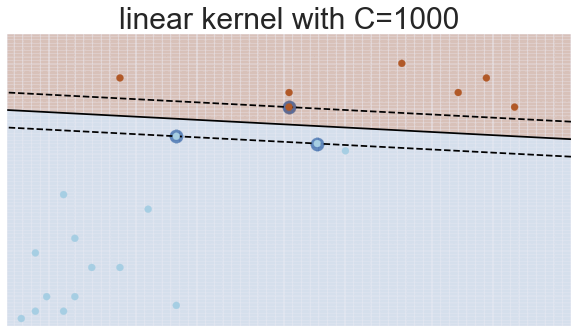

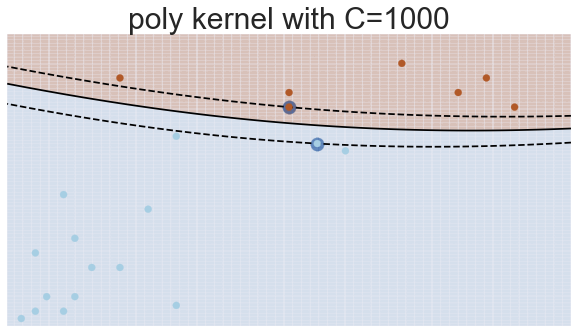

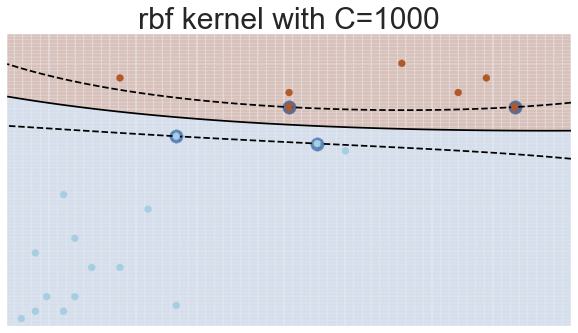

In [39]:
try_svc(CC=1000)

In [44]:
def svc_for_two_class(N=150):
    def f(x):
        return (x ** 3 + x ** 2 + x) / 30.
    xmin = ymin = -5.0
    xmax = ymax = +5.0
    X = np.array(np.random.uniform(low=xmin, high=xmax, size=2*N)).reshape((N, 2))
    noise = np.random.normal(scale=2, size=N)
    fval = f(X[:, 0])
    Y = np.array([-1] * N).reshape(-1)
    Y[np.where(fval + noise > X[:, 1])] = +1
    # fit the model
    kernels = (str('linear'), str('poly'), str('poly'), str('poly'),
               str('rbf'), str('rbf'))
    degrees = (1, 2, 3, 4, 0, 0)
    c_values = (10, 10, 10, 10, 20, 2)
    fig, ax = plt.subplots(len(kernels) // 2, 2, figsize=(20, 30))
    xx = np.linspace(xmin, xmax, 100)  
    
    if len(kernels) != len(degrees) or len(kernels) != len(c_values):
        return
    for n, kernel, c, degree in zip(range(len(kernels)), 
                                    kernels,
                                    c_values,
                                    degrees
                                   ):
        clf = SVC(kernel=kernel, gamma=20, degree=degree, C=c)
        clf.fit(X, Y)
        row = n // 2; col = n % 2
        ax[row, col].scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', 
                             cmap=plt.cm.Paired)
        ax[row, col].plot(xx, f(xx), ls='--', c='magenta')
        ax[row, col].set_xlim([xmin, xmax])
        ax[row, col].set_ylim([ymin, ymax])
        ax[row, col].scatter(clf.support_vectors_[:, 0], 
                             clf.support_vectors_[:, 1], s=80,
                             facecolors='none', zorder=10)
        title = '{} kernel with C={}'.format(kernel, c)
        if kernel == str('poly'):
            title = '{}, degree={} kernel with C={}'.format(kernel, degree, c)
        ax[row, col].set_title(title)
        
        XX, YY = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        ax[row, col].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.05)
        ax[row, col].contour(XX, YY, Z, colors=['k', 'k', 'k'], 
                    linestyles=['--', '-', '--'], levels=[-1., 0, 1.0])

    plt.tight_layout()
    plt.show()
    return

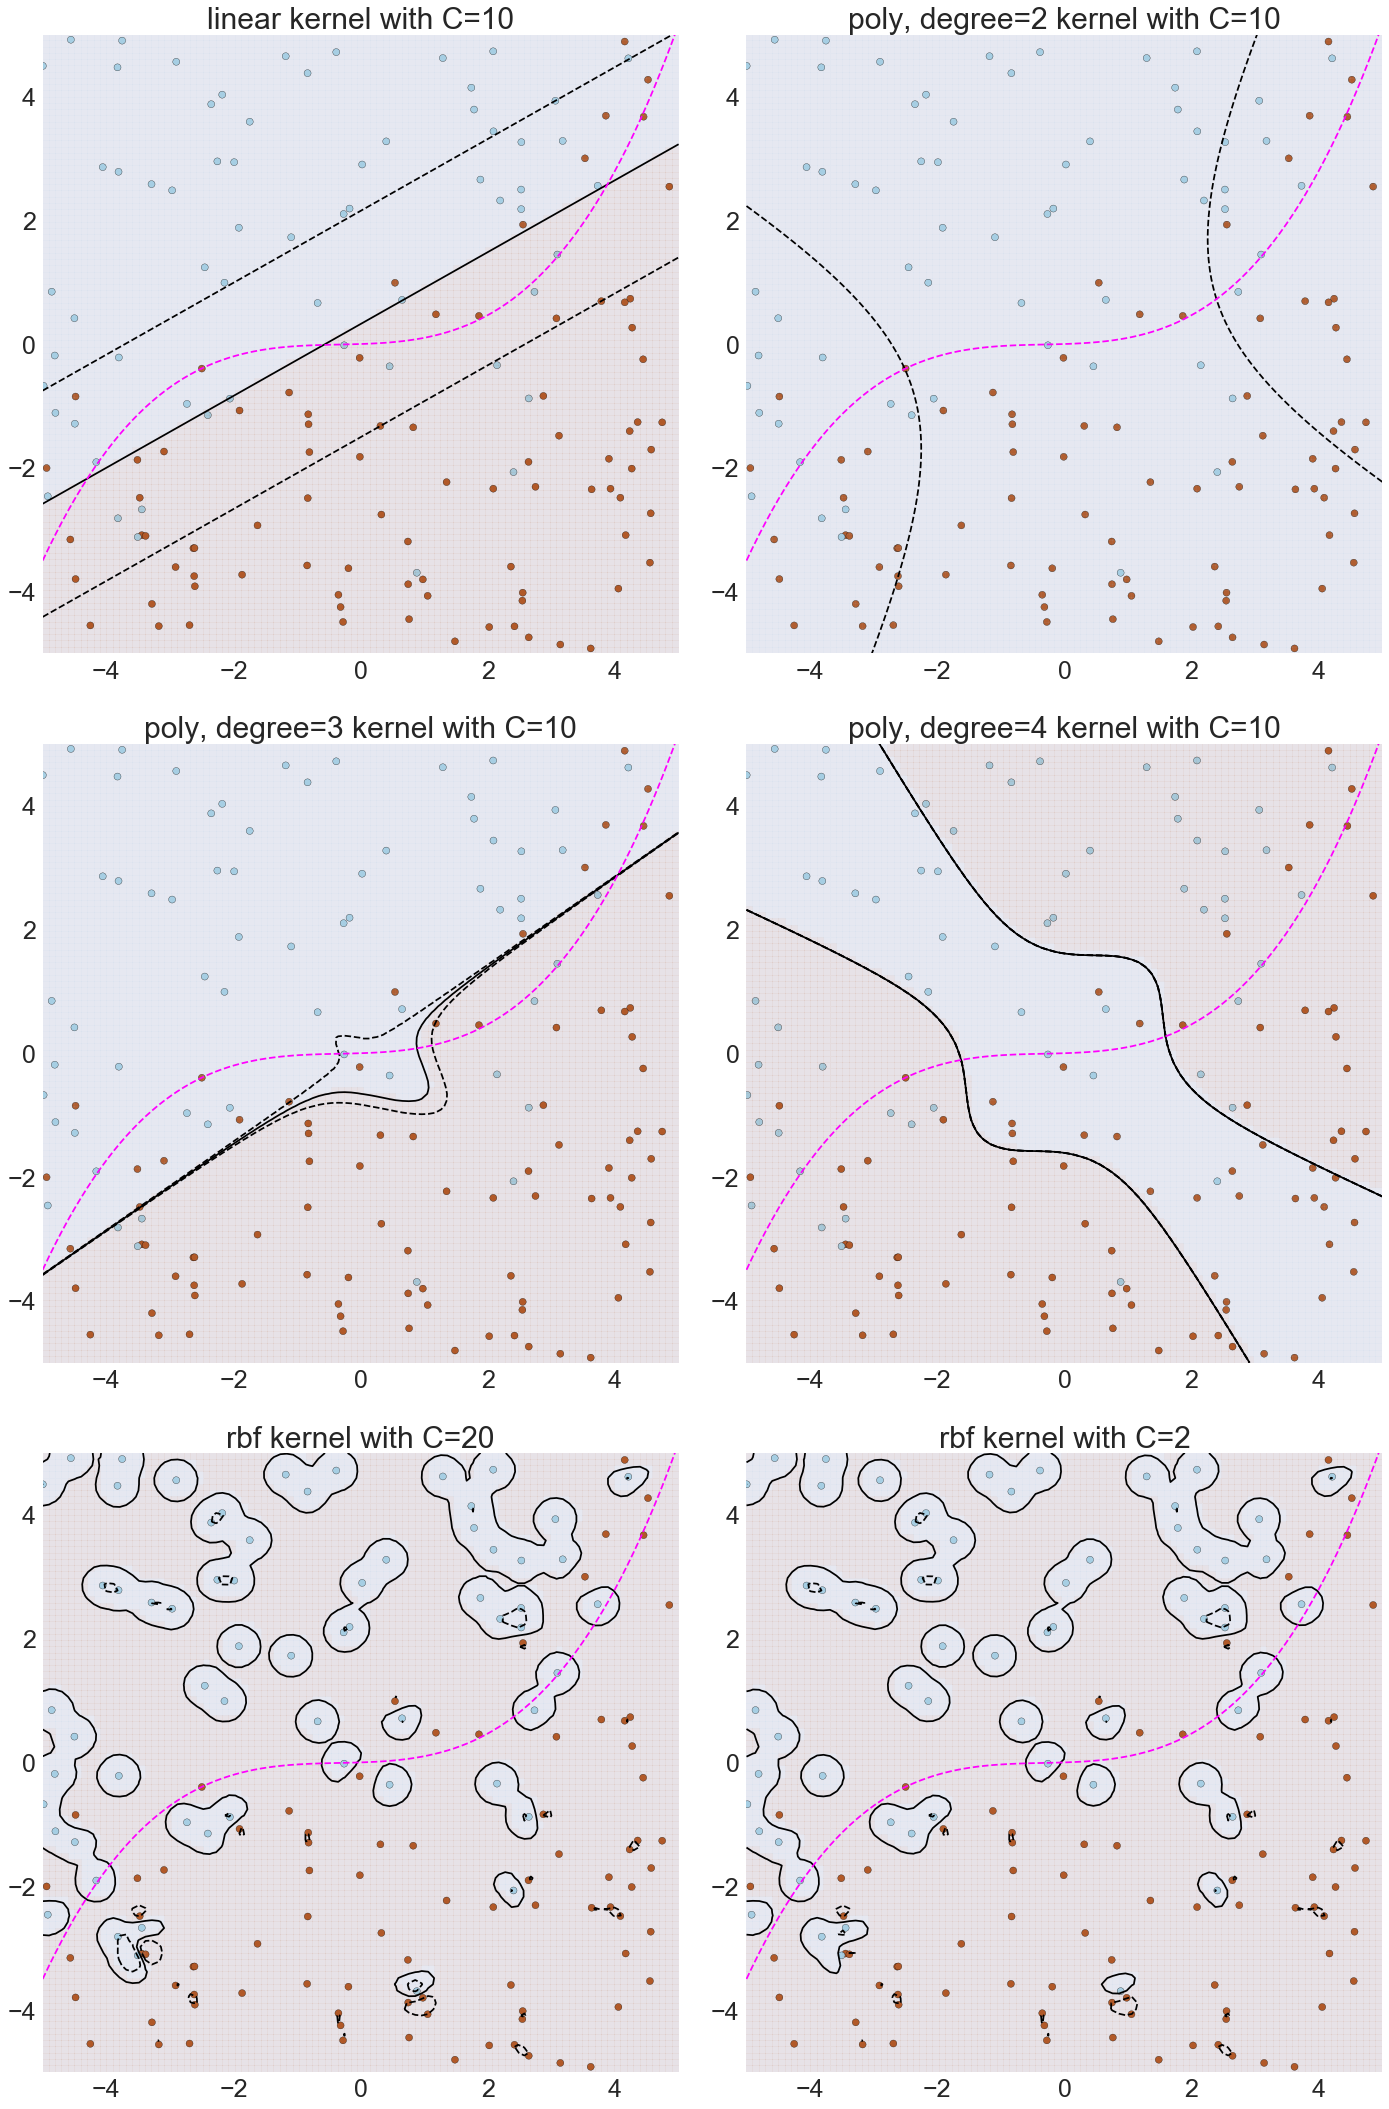

In [45]:
svc_for_two_class()

In [48]:
def svc_for_two_class_optimized(N=150):
    def f(x):
        return (x ** 3 + x ** 2 + x) / 30.
    xmin = ymin = -5.0
    xmax = ymax = +5.0
    X = np.array(np.random.uniform(low=xmin, high=xmax, size=2*N)).reshape((N, 2))
    noise = np.random.normal(scale=2, size=N)
    fval = f(X[:, 0])
    Y = np.array([-1] * N).reshape(-1)
    Y[np.where(fval + noise > X[:, 1])] = +1
    # fit the model
    kernels = (str('linear'), str('poly'), str('poly'), str('poly'),
               str('rbf'), str('rbf'))
    degrees = (1, 2, 3, 4, 0, 0)
    c_values = (0.1, 5., 15., 50.)
    fig, ax = plt.subplots(len(kernels) // 2, 2, figsize=(20, 30))
    xx = np.linspace(xmin, xmax, 100)  
    
    if len(kernels) != len(degrees) or len(kernels) != len(c_values):
        return
    for n, kernel, degree in zip(range(len(kernels)), 
                                    kernels,
                                    degrees
                                   ):
        best_err = 100. * X.shape[0]
        best_c = c
        for try_c in c_values:
            clf = SVC(kernel=kernel, gamma=20, degree=degree, C=try_c)
            clf.fit(X, Y)
            err = clf.score(X, Y)
            print("{} ({}) c={:.3f} --> {:.5f}".format(kernel, degree, try_c, err))
            if err < best_err:
                best_err = err
                best_c = try_c
                
        clf = SVC(kernel=kernel, gamma=20, degree=degree, C=best_c)
        clf.fit(X, Y)
        row = n // 2; col = n % 2
        ax[row, col].scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', 
                             cmap=plt.cm.Paired)
        ax[row, col].plot(xx, f(xx), ls='--', c='magenta')
        ax[row, col].set_xlim([xmin, xmax])
        ax[row, col].set_ylim([ymin, ymax])
        ax[row, col].scatter(clf.support_vectors_[:, 0], 
                             clf.support_vectors_[:, 1], s=80,
                             facecolors='none', zorder=10)
        title = '{} kernel with C={}'.format(kernel, c)
        if kernel == str('poly'):
            title = '{}, degree={} kernel with C={}'.format(kernel, degree, best_c)
        ax[row, col].set_title(title)
        
        XX, YY = np.mgrid[xmin:xmax:25j, ymin:ymax:25j]
        Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(XX.shape)
        ax[row, col].pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired, alpha=0.05)
        ax[row, col].contour(XX, YY, Z, colors=['k', 'k', 'k'], 
                    linestyles=['--', '-', '--'], levels=[-1., 0, 1.0])

    plt.tight_layout()
    plt.show()
    return

linear (1) c=0.1 --> 0.8933333333333333
linear (1) c=5.074999999999999 --> 0.88
linear (1) c=10.049999999999999 --> 0.88
linear (1) c=15.024999999999999 --> 0.88
linear (1) c=20.0 --> 0.88
poly (2) c=0.1 --> 0.5666666666666667
poly (2) c=5.074999999999999 --> 0.5666666666666667
poly (2) c=10.049999999999999 --> 0.5666666666666667
poly (2) c=15.024999999999999 --> 0.54
poly (2) c=20.0 --> 0.5466666666666666
poly (3) c=0.1 --> 0.86
poly (3) c=5.074999999999999 --> 0.8866666666666667
poly (3) c=10.049999999999999 --> 0.88
poly (3) c=15.024999999999999 --> 0.8733333333333333
poly (3) c=20.0 --> 0.88
poly (4) c=0.1 --> 0.56


KeyboardInterrupt: 

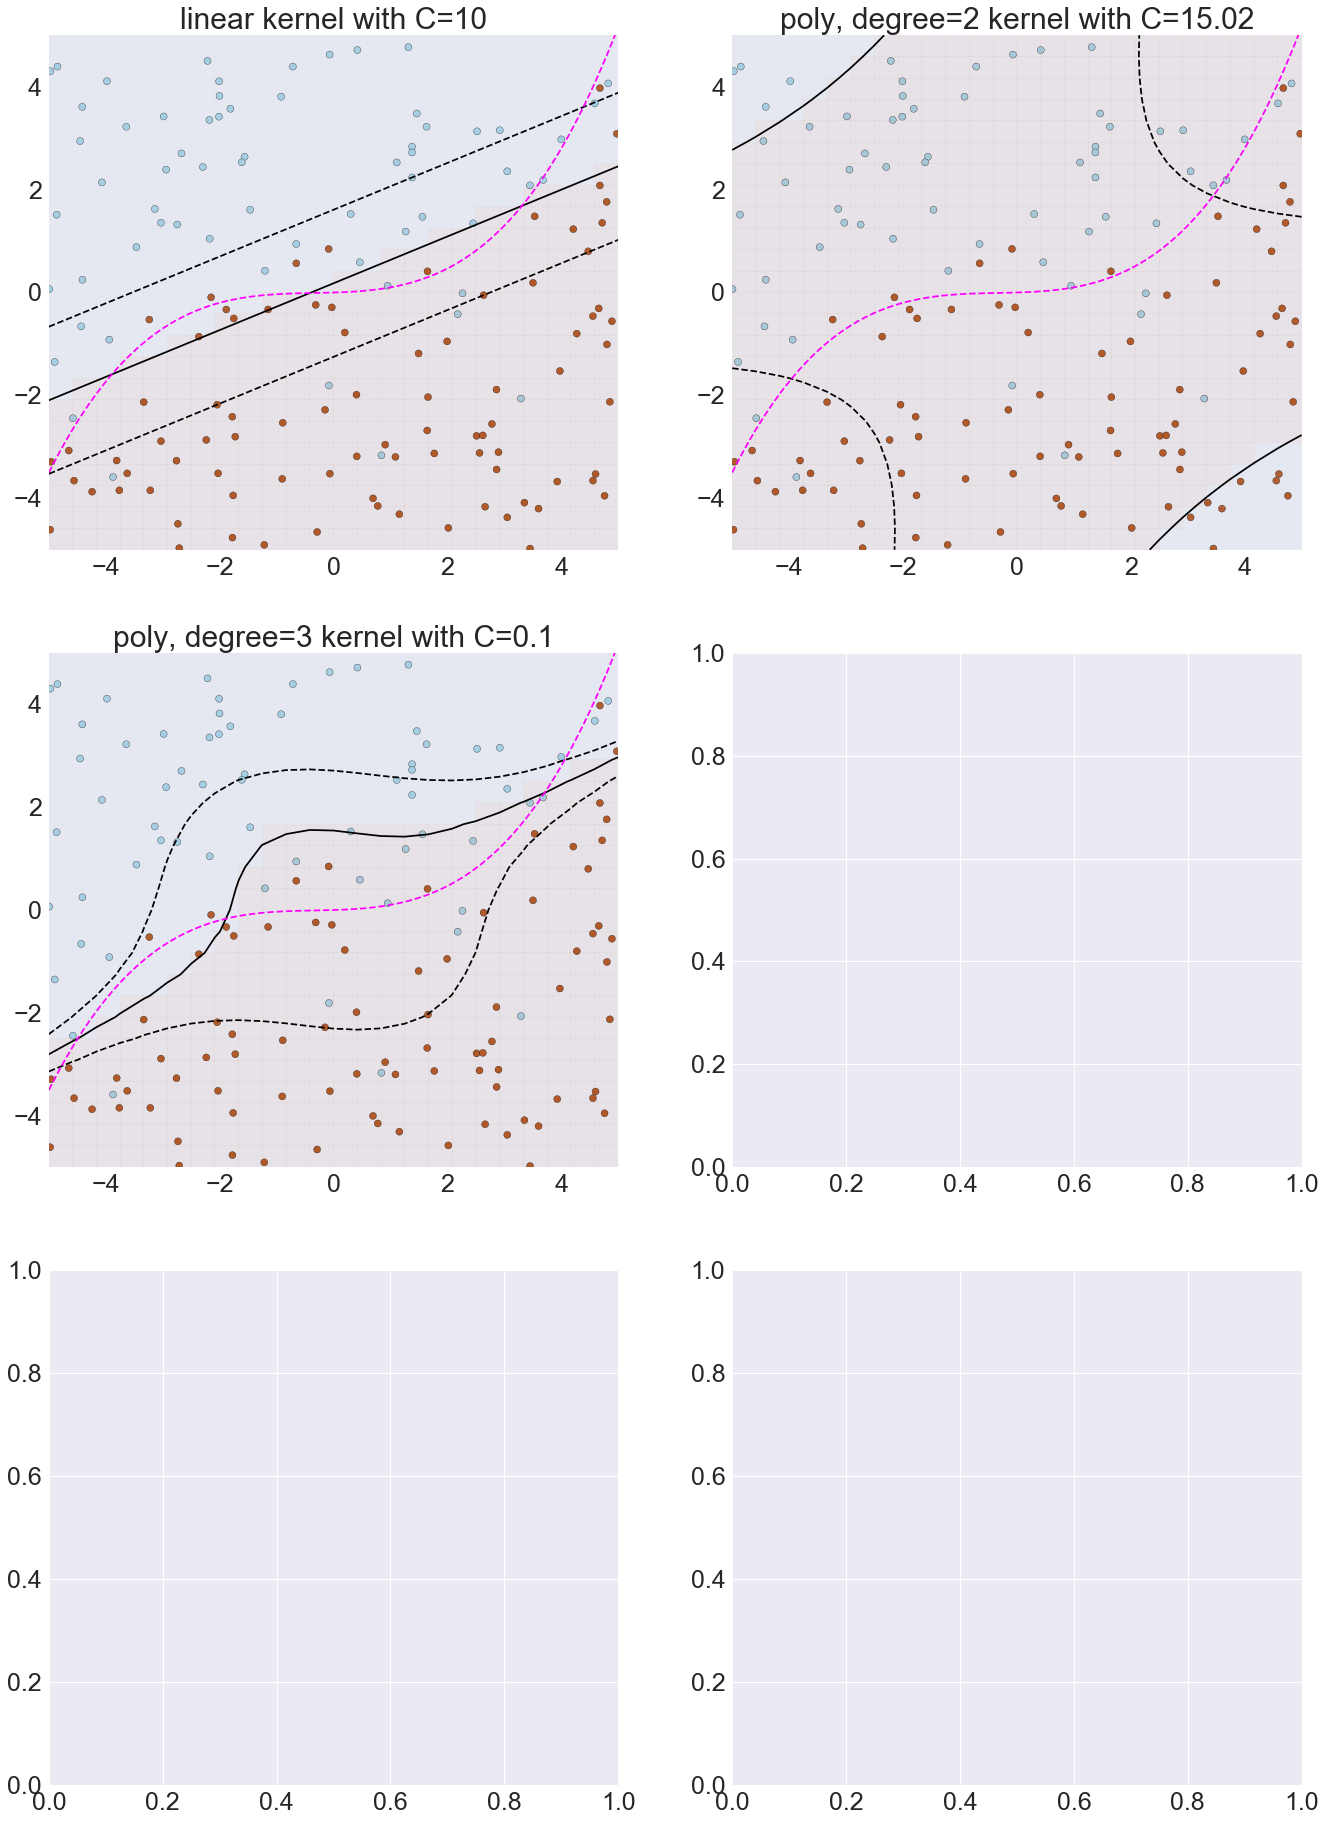

In [49]:
svc_for_two_class_optimized()

### Wybór C i funkcji jądra
1. ważny wybór właściwego $C$
  * kontrola szeregu wartości
  * wartości mogą być zależny od kernela
  * równoważne do wyboru C jest ustalenie warunku
  $$\sum_n\alpha_n\geq\nu$$
  dla $\nu\in[0,1]$
    * czytelniejszy - w bezpośredni sposób uzależnia rozwiązanie od poziomu szumu
2. ważny wybór  jądra
  * lokalne mają wysokie wartości blisko centrum
  * ważny wybór parametru $\sigma^2$ (w gausowskim)
    * jeśli aproksymowana funkcja jest gładka, to  __użyć dużych__ $\sigma$
    * jeśli zmienia się gwałtownie to __małe__ wartości
    * potrzeba dużo danych dla wyboru dobrych własności 
      * problem przy dużych wymiarach mimo, że SVM w zasadzie jest od wymiaru niezależne
  * próbować dużą liczbę różnych funkcji z wykorzystaniem walidacji krzyżowej
    * rozpocząć od jądra liniowego zwiększając złożoność
3. badanie idą w dwóch kierunkach
  * budowy specjalnie dostosowanych do problemów funkcji jądra
    * jeśli dane mają wymiary zadane jako cechy tak/nie, to dobrym wyborem jest jądro z funkcji Jaccarda (i podobne)
  * budowy SVM wykorzystującego __kilka__ funkcji na raz
    * jądra zdefiniowane jako kombinacja liniowa innych funkcji jądra
      * konieczne zapewnienie by łączna macierz była dodatnio półokreślona
    * jako kombinacja liniowa algorytmów zbudowanych na różnych jądrach    

### SVM dla problemów wieloklasowych
1. SVM jest zdefiniowane dla binarnych
2. standardowe podejścia dla problemów wieloklasowych
  * __one_against_all__ 
    * $K$ modeli $f_k(x)$
    * każdy rozpoznaje jedną klasę przeciwko pozostałym
    * wybór przez
    $$\underset{k}{\arg\max}\; f_k(x)$$
    * mogą być obszary w których więcej niż jeden model daje dodatnią wartość
    * pojawia się problem niezbalansowania klas
      * niech oryginalnie będzie tyle samo przykładów dla każdej klasy
      * pojedynczy model ma wtedy $(K-1)$ więcej przykładów klasy negatywnej niż pozytywnej
  * __one_against_one__
    * $K(K-1)/2$ modeli dla każdej pary klas
    * wybór przez głosowanie
    * wadą dużo uczenia oraz często niejednoznaczności wyboru
  * __Error Correcting Codes ECOC__
    * każdy model uczy się rozpoznawania (w przybliżeniu) połowy klas względem reszty
    * uczonych jest kilkanaście takich (różnych) modeli
    * wybór przez głosowanie
    

### Złożoność obliczeniowa

1. model budowany przez programowanie kwadratowe
  * złożoność rzędu $\mathcal{O}(N^3)$
  * problem może być rozłożony na wiele mniejszych
    * sekwencja mniejszych problemów
    * zwykle daje złożoność od $\mathcal{O}(N)$ do $\mathcal{O}(N^{2.3})$
2. problemem często konieczność przechowywania wszystkich danych (wartości macierzy Grama) w pamięci
  * rozwiązanie przez podział na bloki (chunking)

# Ridge regression
1. zadanie minimalizacji
$$\boxed{L(\theta,\lambda)=\sum_{n=1}^N\left(y_n-\theta^Tx_n\right)^2+\lambda\|\theta\|^2\;}$$
dla $\lambda\geq0$
  * minimalizowany błąd modelu (pierwszy składnik) oraz norma wektora parametrów
  * próba zminimalizacji __wpływ mniej istotnych współrzędnych__
2. dane generowane przez __nieliniowy__ proces
$$y_n=g(x_n)+\eta_n$$
3. możemy utworzyć __hipotezę__ $f$ wykorzystujące model
$$f(x)=\sum_{n=1}^N\theta_nk(x,x_n)$$
gdzie $k(\cdot,\cdot)$ jest funkcją jądra $$k:\mathbb{R}^l\times\mathbb{R}^l\ni(x,y)\longrightarrow{}k(x,y)\in\mathbb{R}$$
  * w takim razie
  $$L(\theta)=\sum_{n=1}^N\left(y_n-\sum_{n=1}^N\theta_nk(x,x_n)\right)^2+\lambda<f, f>$$

## $\epsilon$-czuła regresja liniowa

### funkcja kosztu

1. dla regresji definicja __$\epsilon$-czułej__ funkcji kosztu
  * __liniowa__
  $$L^{\epsilon}(x,y,f)=|y-f(x)|_{\epsilon}=\max(0, |y-f(x)|-\epsilon)$$
  * __kwadratowa__
  $$L_2^{\epsilon}(x,y,f)=|y-f(x)|_{\epsilon}^2=\max(0, |y-f(x)|^2-\epsilon)$$
  

In [50]:
def epsilon_insensitive():
    fig, ax = plt.subplots(1, 1, figsize=(16, 12))
    xmin = -2.0; xmax = -xmin
    xx = np.linspace(xmin, xmax, 100)
    epsilon_lin=0.5
    ax.plot(xx, np.abs(xx), c='black', lw=1)
    ax.plot(xx, np.maximum(0, (np.abs(xx) - epsilon_lin)), c='black', ls="--", lw=2)
    ax.plot(xx, xx ** 2, c='orange', lw=1)
    epsilon_sqr = epsilon_lin ** 2
    ax.plot(xx, np.maximum(0, (xx ** 2 - epsilon_sqr)), c='orange', ls="--", lw=2)
    ax.set_xlim([xmin, xmax])

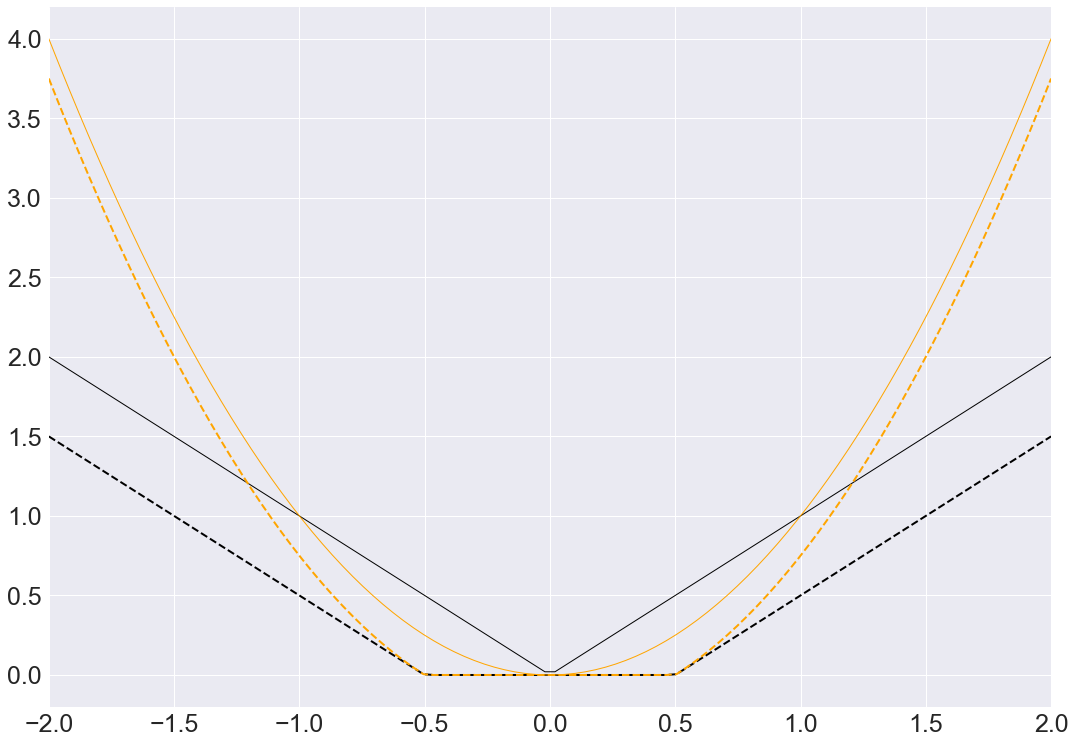

In [51]:
epsilon_insensitive()

In [52]:
def svr_tube(N=50):
    def f(x):
        return (x ** 3 + x ** 2 + x) / 30.
    xmin = ymin = -5.0
    xmax = ymax = +5.0
    X = np.array(np.random.uniform(low=xmin, high=xmax, size=N)).reshape(-1)
    Y = f(X) + np.random.normal(scale=0.5, size=N)
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    xx = np.linspace(xmin, xmax, 100)
    ax.plot(xx, f(xx), c='black', lw=2)
    epsilon = 0.5
    ax.plot(xx, f(xx) - epsilon, c='black', ls='--', lw=1)
    ax.plot(xx, f(xx) + epsilon, c='black', ls='--', lw=1)
    ax.fill_between(xx, f(xx) - epsilon, f(xx) + epsilon, facecolor='grey', alpha=0.2)
    ax.scatter(X, Y)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])

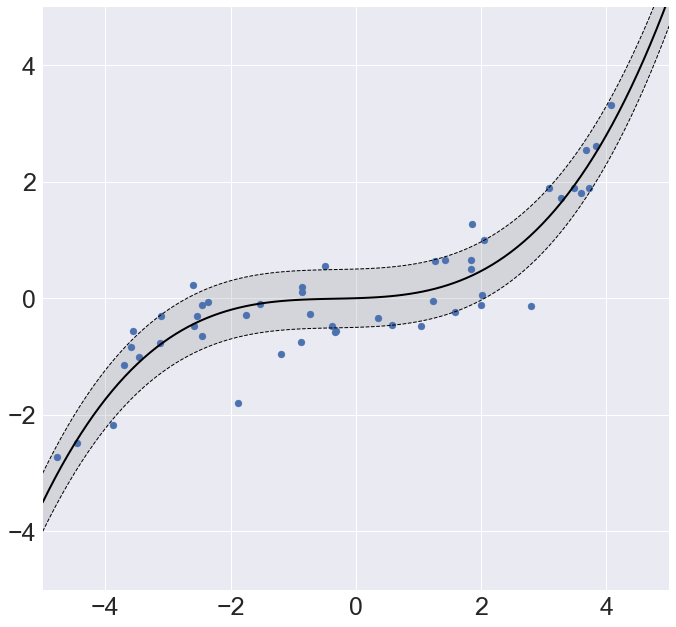

In [53]:
svr_tube()

### Model

1. __minimalizacja__ (kwadratowa funkcja kosztu)
$$\|\theta\|^2+\sum_{n=1}^NL_2^{\epsilon}(x_n,y_n,f)$$
  * problem __pierwotny__
  $$\boxed{\begin{align}
  \text{minimalizuj}\;\;\;&\|\theta\|^2+C\sum_{n=1}^N(\widehat{\xi}_{n}^2+\xi_{n}^2)\\
  \text{pod warunkiem}\;\;\;&(<\theta,x_n>+\theta_0)-y_n<\epsilon+\widehat{\xi}_{i}\\
  &y_n-(<\theta,x_n>+\theta_0)<\epsilon+\xi_{i}\\
  &\xi_n, \widehat{\xi}_n\geq0 \;\;\forall\;n
  \end{align}\;}$$
  gdzie $\xi$ i $\widehat{\xi}$ -- zmienne rozluźniające (ang. slack) odpowiedzialne   za błąd gdy 
    * wartość przybliżenia jest __większa__ od prawdziwej wartości o $\epsilon$ powiększone o $\xi$
    * wartość przybliżenia jest __mniejsza__ od prawidłowej wartości o $\epsilon$ powiększone o $\xi$
    * $\xi_n\widehat{\xi}_n=0$
2. problem __dualny__
$$\begin{align}
    \left.\frac{\partial}{\partial\theta}L(\theta,\alpha)\right|_{\theta=\theta^{\ast}}&=0\\
    \alpha_n&\geq0\hspace{2ex}\forall\;n\\
    \alpha_n f(\theta^{\ast})&=0\hspace{2ex}\forall\;n
    \end{align}$$
  * otrzymując
  $$\begin{align}
  L(\alpha)=&\frac{1}{2}\|\theta\|^2+C\left(\sum_n\xi_n+\sum_n\widehat{\xi}_n\right)\\
  &+\sum_n{\alpha}_n(y_n-\theta^Tx_n-\theta_0-\epsilon-{\xi}_n)\\
  &+\sum_n\widehat{\alpha}_n(\theta^Tx_n+\theta_0-y_n-\epsilon-\widehat{\xi}_n)\\
  &-\sum_n\widehat\mu_n\widehat\xi_n-\sum_n\mu_n\xi_n
\end{align}$$
  przy czym $\displaystyle \widehat\xi_n\xi_n=0\hspace{2ex}\widehat\alpha_n\alpha_n=0$

In [56]:
def svr(N=50):
    def f(x):
        return (x ** 3 + x ** 2 + x) / 30.
    xmin = ymin = -5.0
    xmax = ymax = +5.0
    X = np.array(np.random.uniform(low=xmin, high=xmax, size=N)).reshape((N, 1))
    Y = f(X) + np.random.normal(scale=0.75, size=N).reshape((N, 1))
    # fit the model
    kernels = (str('linear'), str('poly'), str('poly'), str('poly'),
               str('rbf'), str('rbf'))
    degrees = (1, 2, 3, 4, 0, 0)
    c_values = (10, 10, 10, 10, 20, 2)
    fig, ax = plt.subplots(len(kernels) // 2, 2, figsize=(20, 30))
    xx = np.linspace(xmin, xmax, 100)  
    
    if len(kernels) != len(degrees) or len(kernels) != len(c_values):
        return
    epsilon = 0.15
    for n, kernel, c, degree in zip(range(len(kernels)), 
                                    kernels,
                                    c_values,
                                    degrees
                                   ):
        best_err = 100. * X.shape[0]
        best_c = c
        for try_c in (0.1, 5., 7., 10., 13., 17., 21., 24., 27., 30.):
            clf = SVR(kernel=kernel, gamma='auto', degree=degree, C=try_c)
            clf.fit(X, Y)
            err = clf.score(X, Y)
            print("{} ({}) c={} --> {:.5f}".format(kernel, degree, try_c, err))
            if np.abs(err) < best_err:
                best_err = np.abs(err)
                best_c = try_c
                
        clf = SVR(kernel=kernel, gamma=20, degree=degree, C=best_c)
        clf.fit(X, Y)

        row = n // 2; col = n % 2
        ax[row, col].scatter(X, Y, edgecolors='k', cmap=plt.cm.Paired)
        ax[row, col].plot(xx, f(xx), ls='--', c='magenta', label="true")
        ax[row, col].set_xlim([xmin, xmax])
        ax[row, col].set_ylim([ymin, ymax])
        # print('SV ({}): {}'.format(clf.support_vectors_.shape, clf.support_vectors_))
        # ax[row, col].scatter(clf.support_vectors_[:, 0], 
        #                      clf.support_vectors_[:, 1], s=80,
        #                      facecolors='none', zorder=10)
        yy = clf.predict(xx.reshape((len(xx), 1)))
        ax[row, col].plot(xx, yy, c='orange', ls='--', lw=2, label="approximation")
        title = '{} kernel with C={}'.format(kernel, c)
        if kernel == str('poly'):
            title = '{}, degree={} kernel with C={}'.format(kernel, degree, 
                                                            np.round(best_c, 2))
        ax[row, col].set_title(title)
        
    fig.tight_layout()
    fig.set_label("best")

/Users/igorpodolak/anaconda/envs/tf/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


linear (1) c=0.1 --> 0.5093759896864374
linear (1) c=5.0 --> 0.5288152946638739
linear (1) c=7.0 --> 0.5288150161622436
linear (1) c=10.0 --> 0.5288145984462078
linear (1) c=13.0 --> 0.5288141807293241
linear (1) c=17.0 --> 0.5288136237176465
linear (1) c=21.0 --> 0.5288130667196641
linear (1) c=24.0 --> 0.5288126489371082
linear (1) c=27.0 --> 0.5288122311608527
linear (1) c=30.0 --> 0.5288118133612245
poly (2) c=0.1 --> 0.01611582055472449
poly (2) c=5.0 --> 0.01609826145613924
poly (2) c=7.0 --> 0.01609109386821006
poly (2) c=10.0 --> 0.01608034224772059
poly (2) c=13.0 --> 0.01606958861177399
poly (2) c=17.0 --> 0.016055251187757302
poly (2) c=21.0 --> 0.016040911257432344
poly (2) c=24.0 --> 0.016030156093079784
poly (2) c=27.0 --> 0.016019399361008047
poly (2) c=30.0 --> 0.016008642562220787
poly (3) c=0.1 --> 0.6810838140132778
poly (3) c=5.0 --> 0.6810900545352557
poly (3) c=7.0 --> 0.6810925653118326
poly (3) c=10.0 --> 0.6810962919074931
poly (3) c=13.0 --> 0.6810999710662402

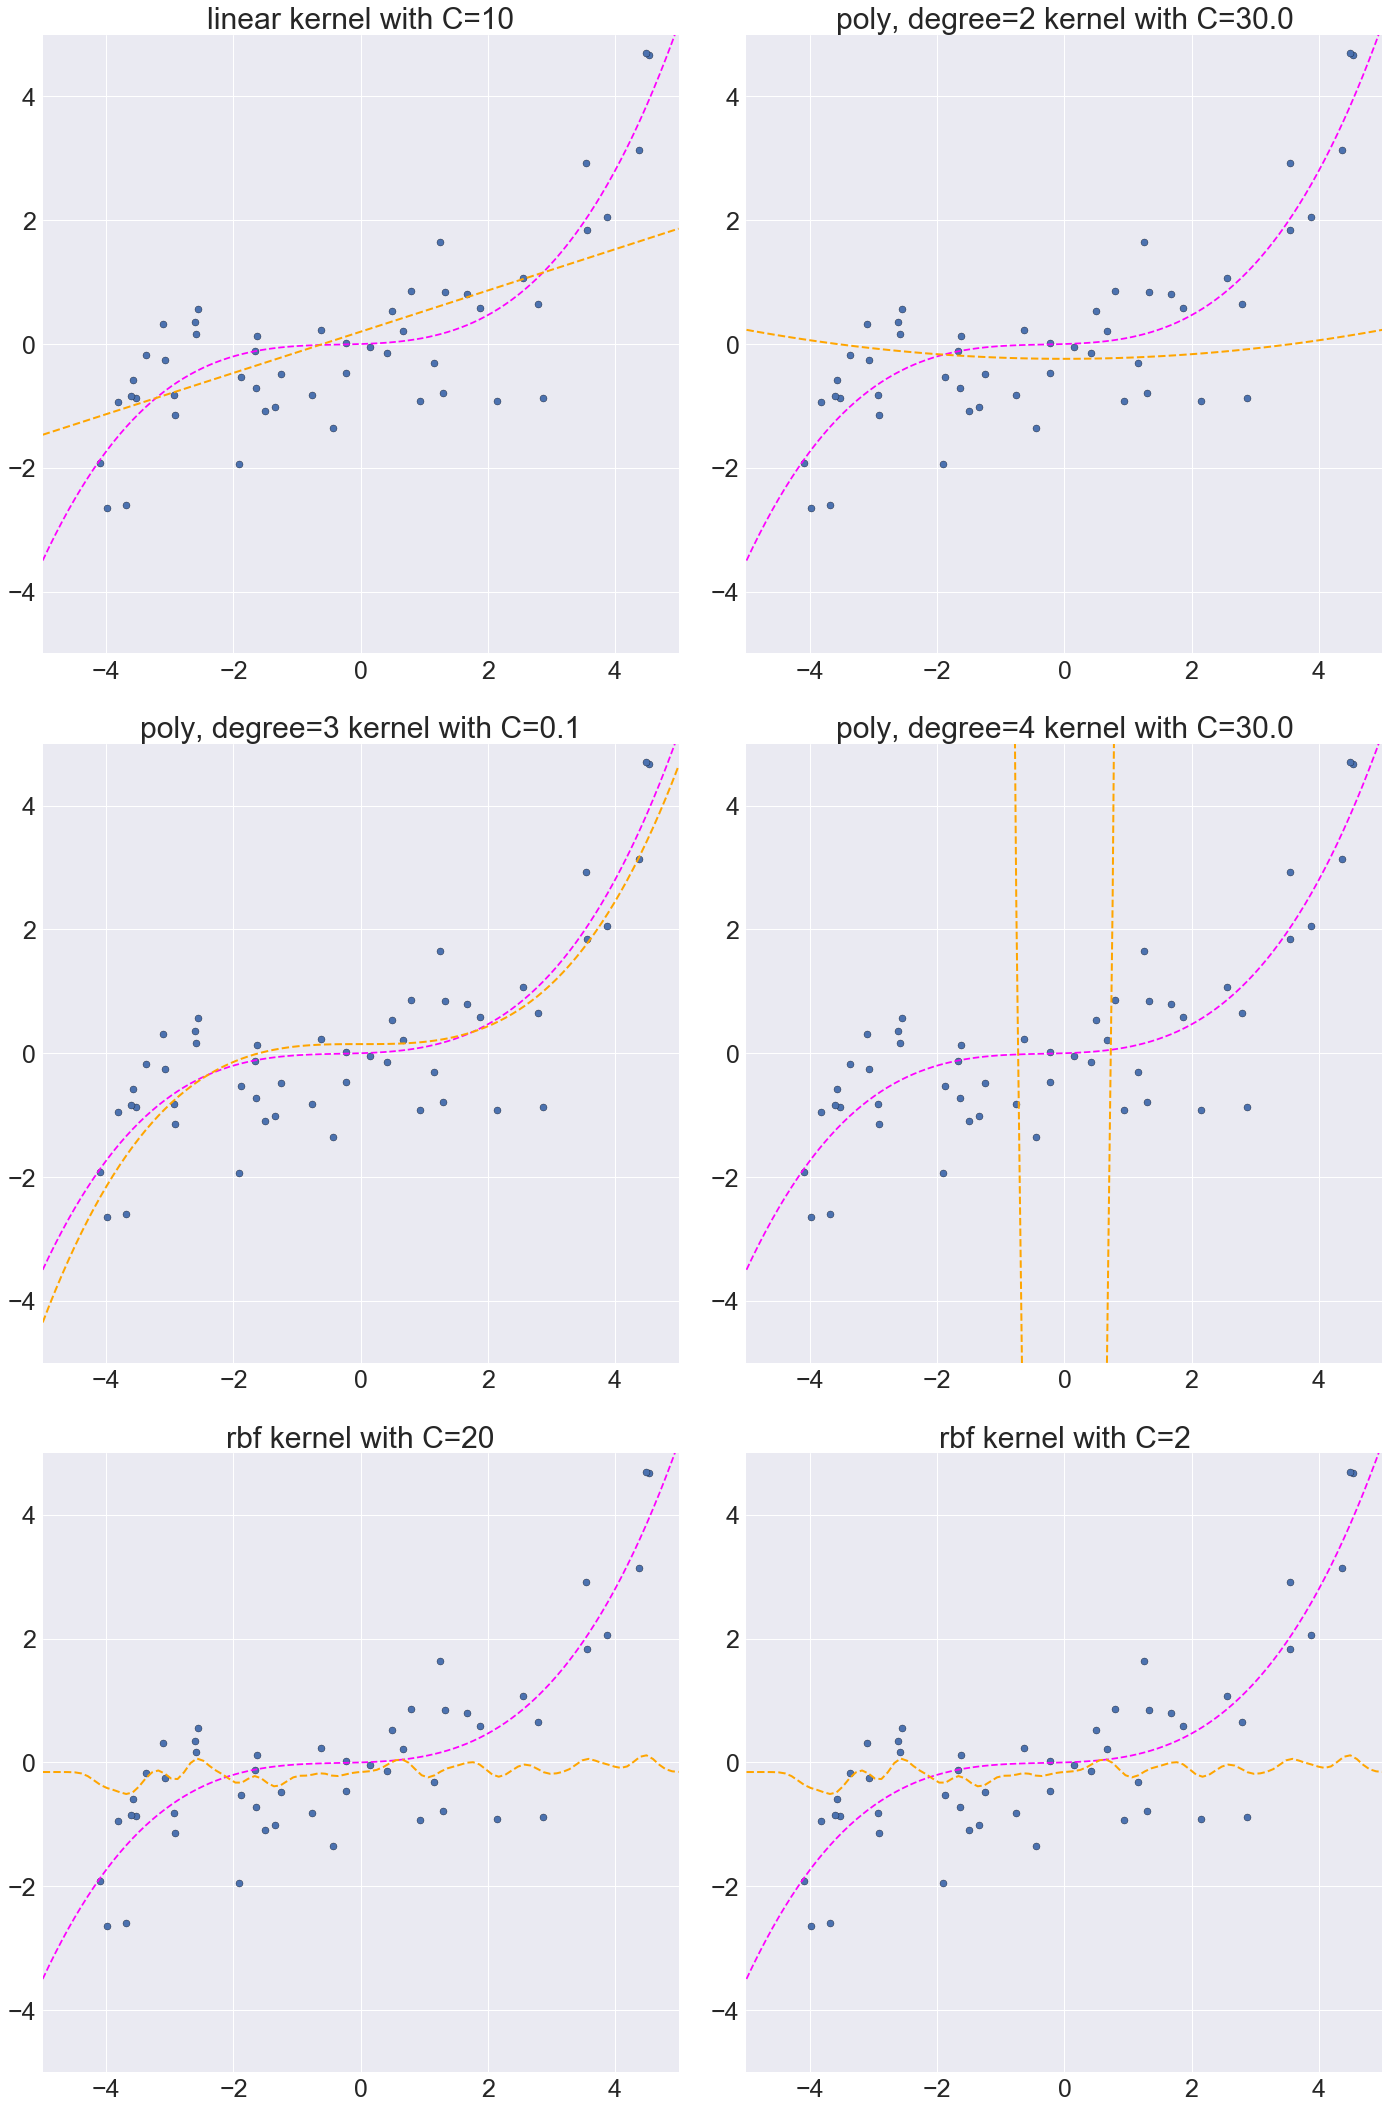

In [57]:
svr()